# 💔Heart Failure Prediction (M.L 🆚 D.L)

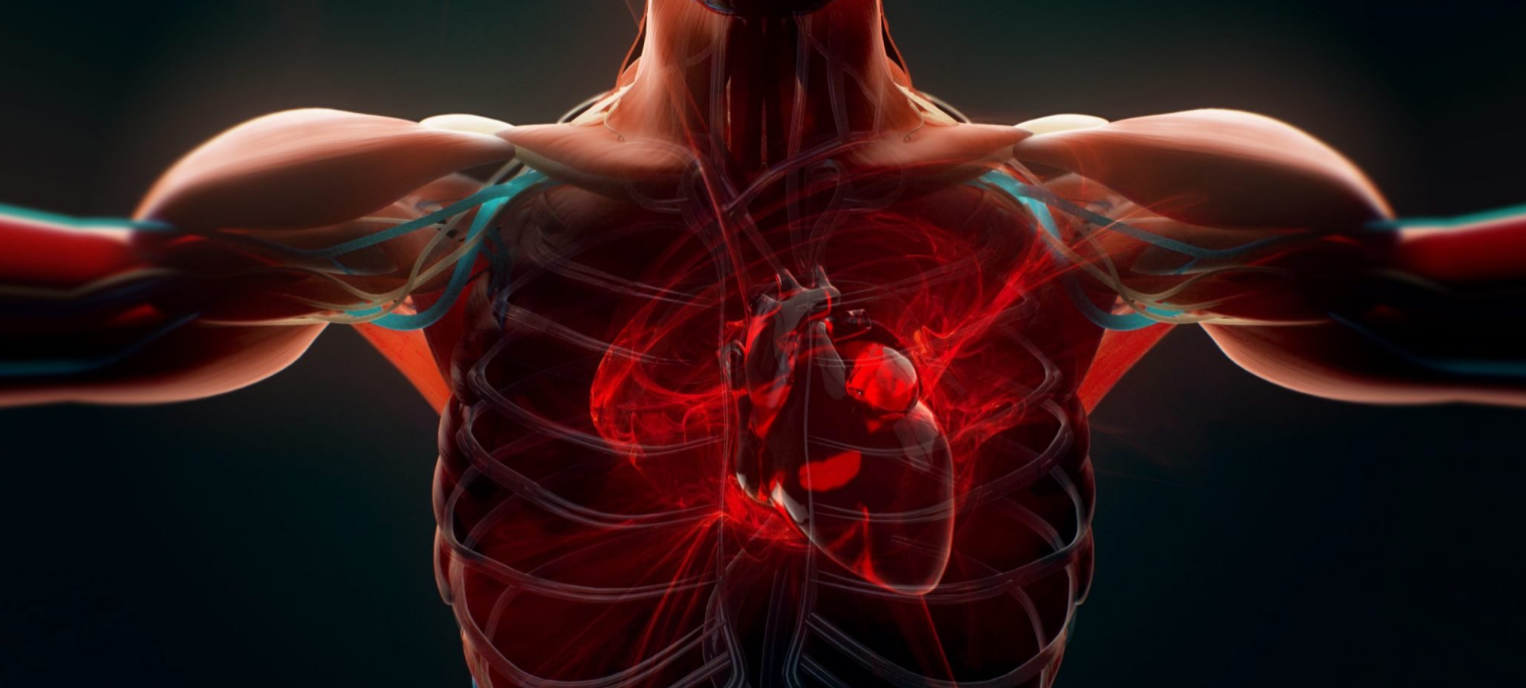

In [ ]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\Heart.png")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings
warnings.filterwarnings('ignore')
import tensorflow
from tensorflow import keras
%matplotlib inline

In [ ]:
df=pd.read_csv("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\heart_failure_clinical_records_dataset.csv")
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [ ]:
df.shape

(299, 13)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
df1=df.copy()
df2=df1.copy()

In [ ]:
df.rename(columns={'sex':'gender','DEATH_EVENT':'death','high_blood_pressure':'high_bp'},inplace=True)
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_bp  platelets  serum_creatinine  serum_sodium  gender  smoking  \
0          1  265000.00               1.9           130       1        0   
1          0  263358.03               1.1           136       1        0   
2          0  162000.00               1.3           129       1        1   
3          0  210000.00               1.9           137       1        0   
4          0  327000.00               2.7           116       0        0   
..       ...        ...               ...           ...     ...      ...   
294        1  155000.00               1.1           143       1        1   
295        0  270000.00               1.2           139       0        0   
296        0  742000.00               0.8           138       0        0   
297        0  140000.00               1.4           140       1        1   
298        0  395000.00               1.6           136       1        1   

     time  death  
0       4      1  
1       6      1  
2       7      1  
3       7      1  
4       8      1  
..    ...    ...  
294   270      0  
295   271      0  
296   278      0  
297   280      0  
298   285      0  

[299 rows x 13 columns]

In [ ]:
df.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
anaemia                   299.0       0.431438      0.496107      0.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
diabetes                  299.0       0.418060      0.494067      0.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
high_bp                   299.0       0.351171      0.478136      0.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
gender                    299.0       0.648829      0.478136      0.0   
smoking                   299.0       0.321070      0.467670      0.0   
time                      299.0     130.260870     77.614208      4.0   
death                     299.0       0.321070      0.467670      0.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
anaemia                        0.0       0.0       1.0       1.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
diabetes                       0.0       0.0       1.0       1.0  
ejection_fraction             30.0      38.0      45.0      80.0  
high_bp                        0.0       0.0       1.0       1.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
gender                         0.0       1.0       1.0       1.0  
smoking                        0.0       0.0       1.0       1.0  
time                          73.0     115.0     203.0     285.0  
death                          0.0       0.0       1.0       1.0

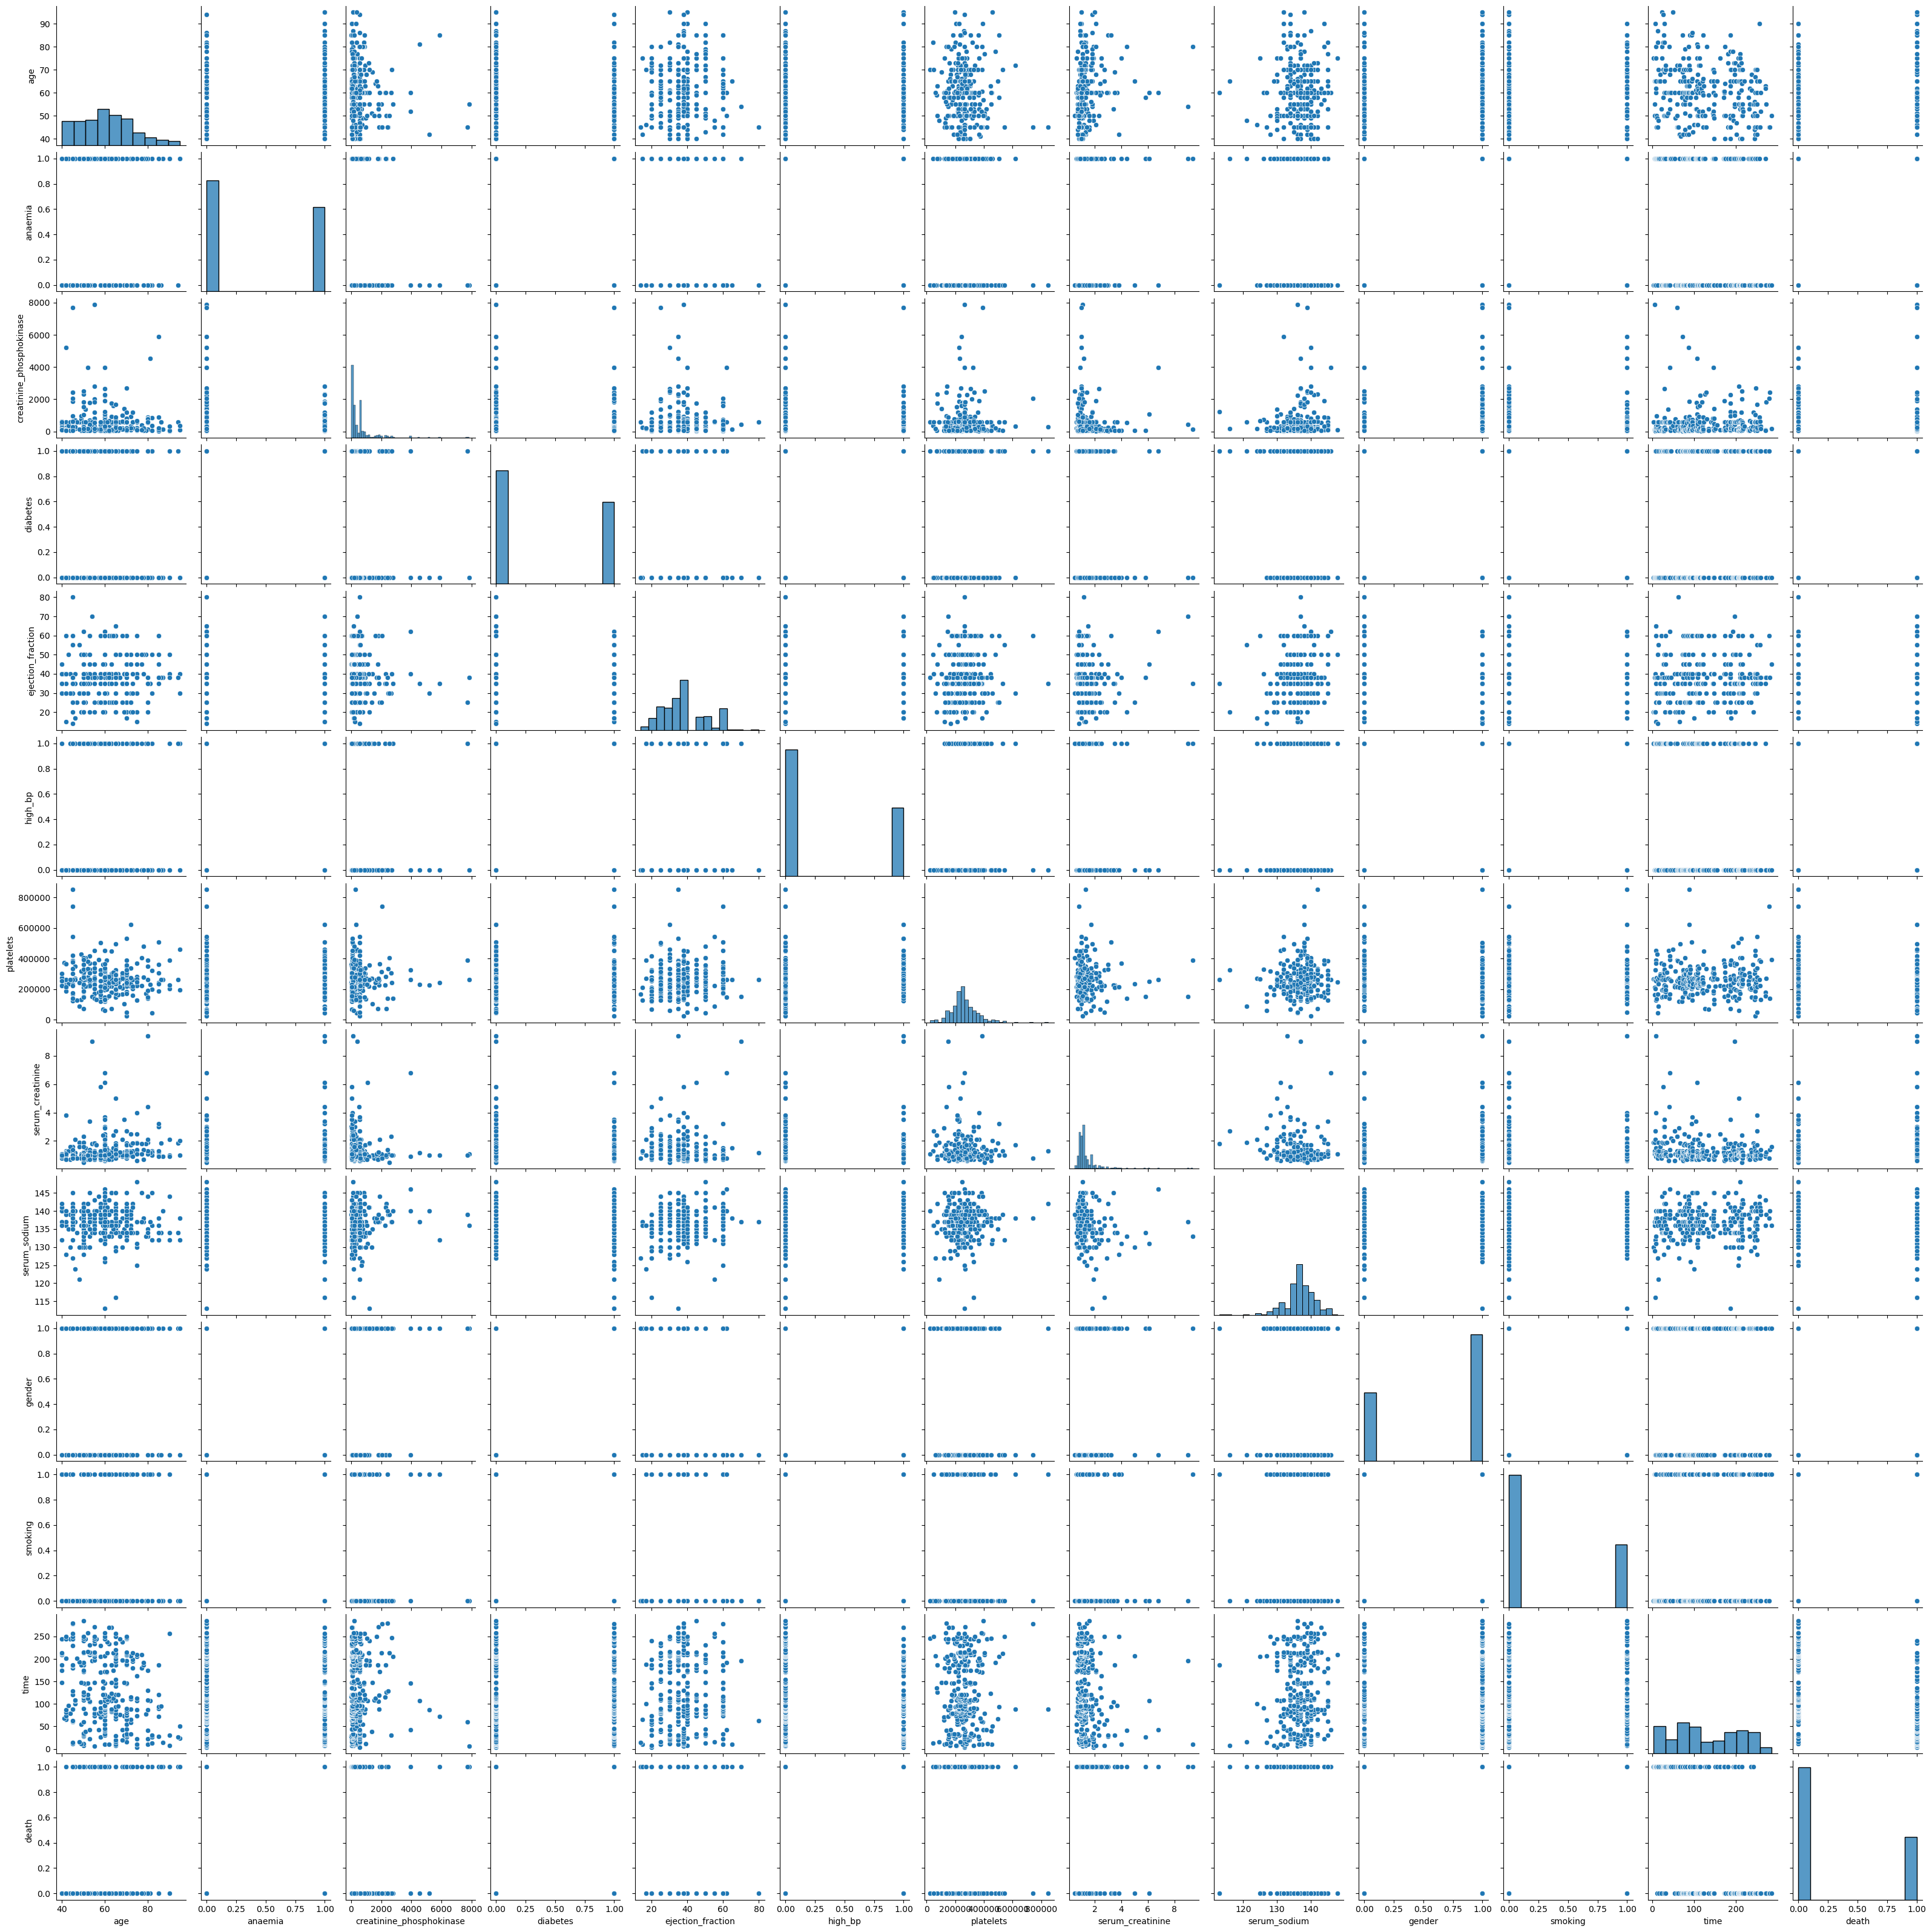

In [ ]:
sns.pairplot(df)

## Correlation

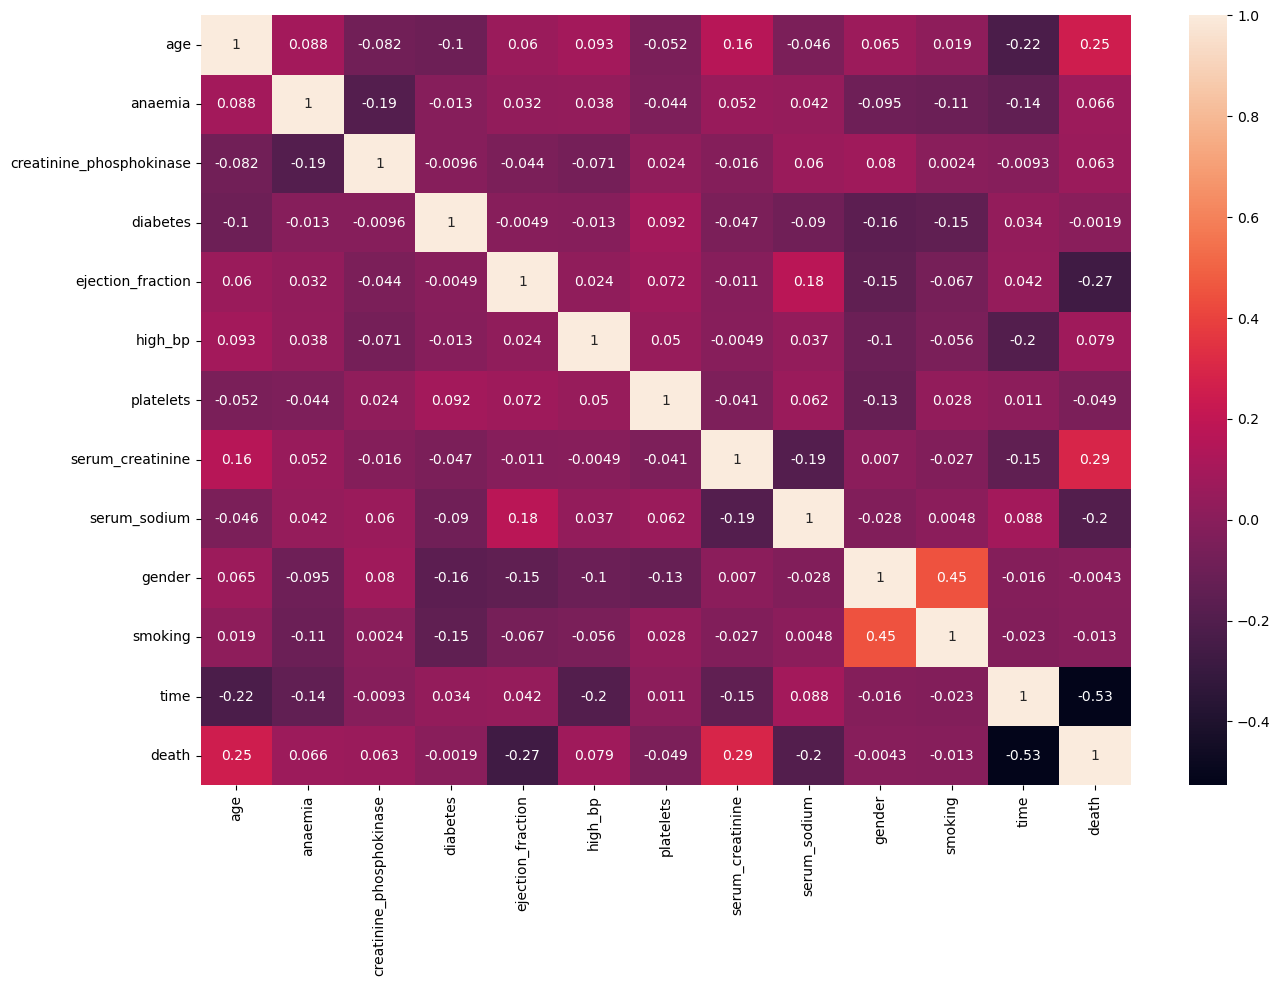

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

## Distribution

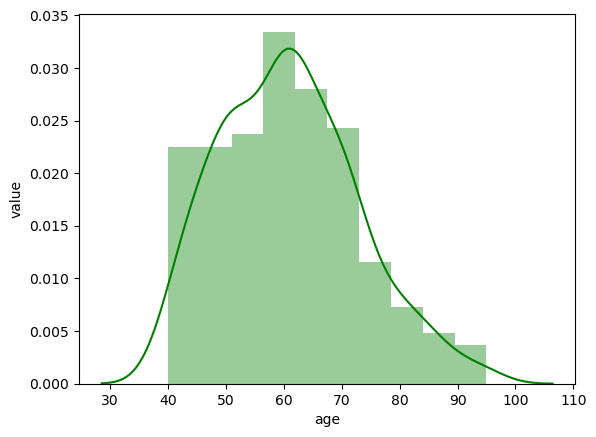

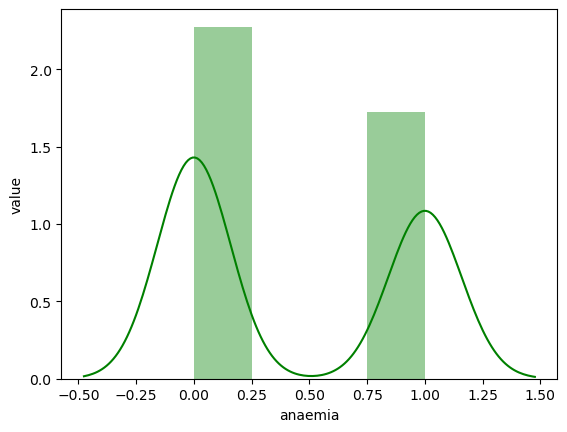

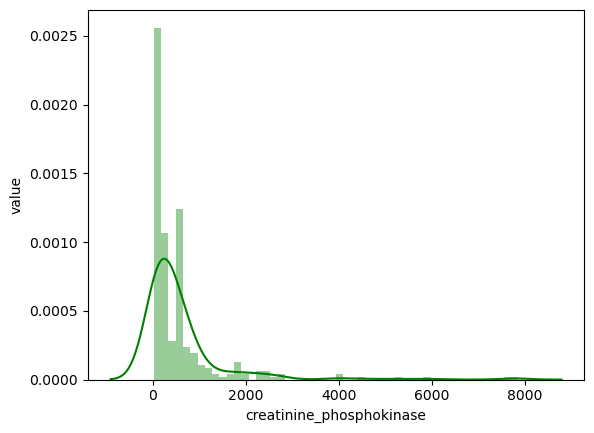

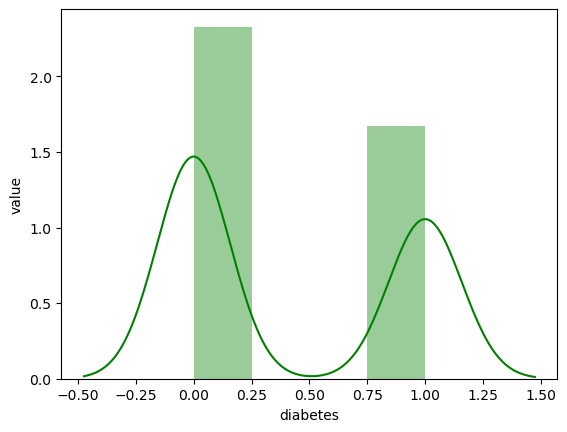

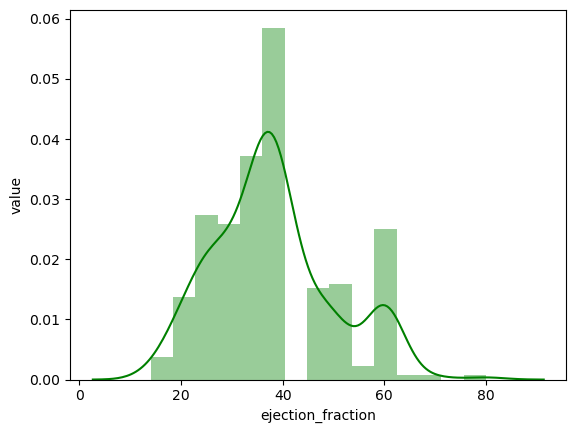

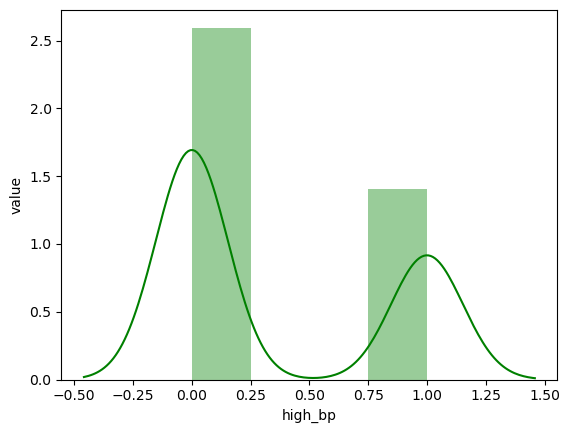

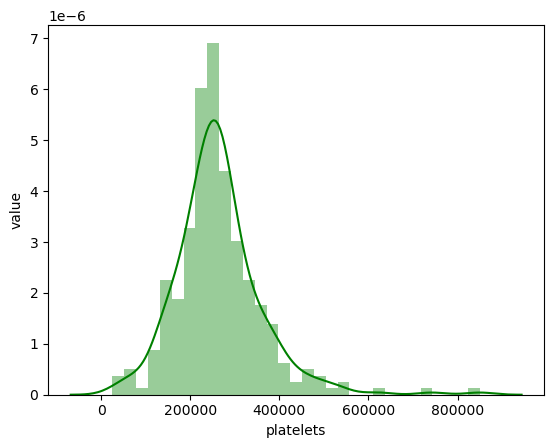

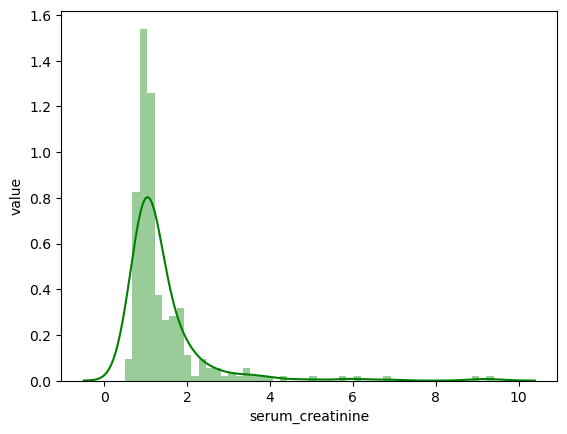

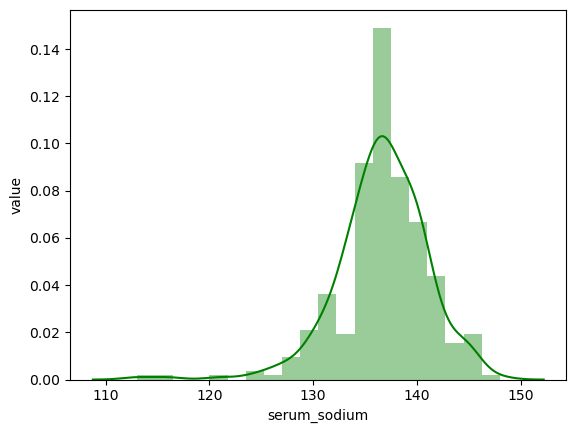

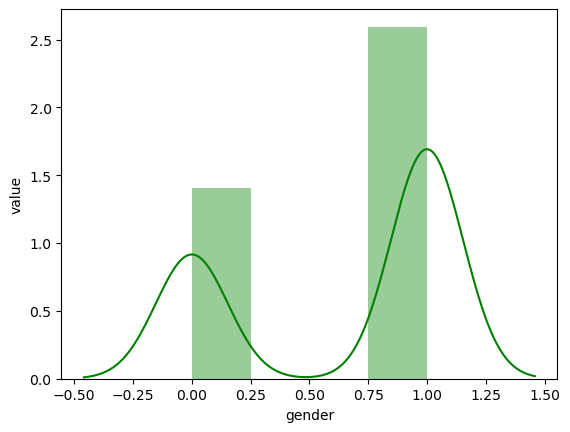

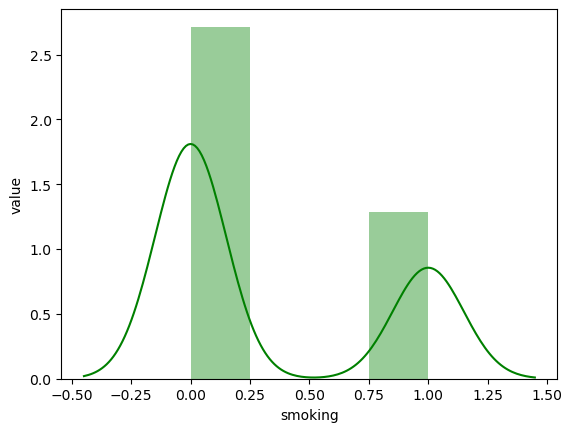

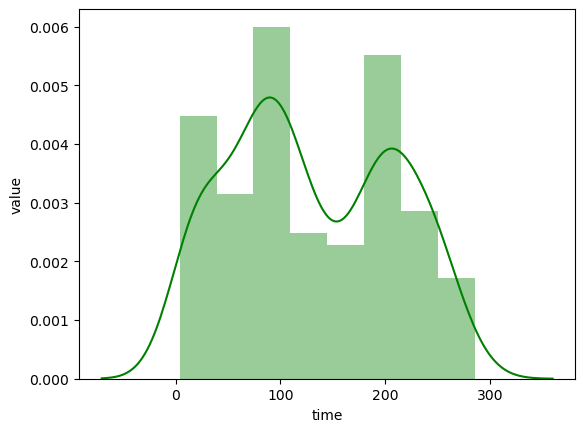

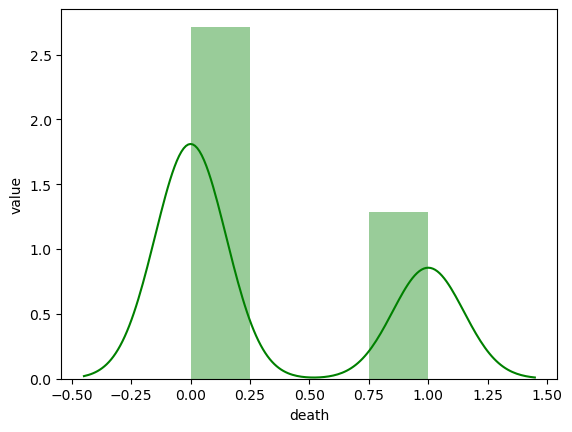

In [ ]:
for i in df.columns:
    sns.distplot(df[i],color='green')
    plt.xlabel(i)
    plt.ylabel('value')
    plt.show()

## Count of unique Values in the columns  

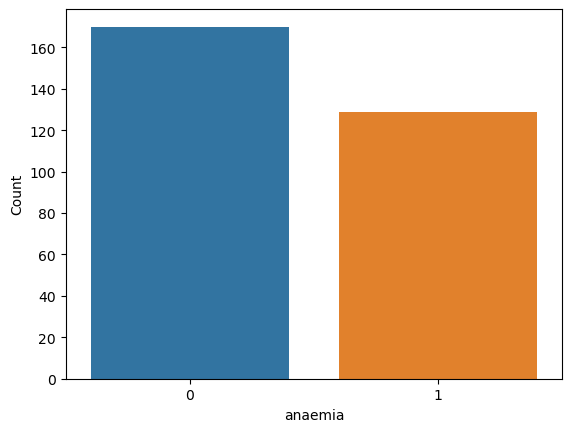

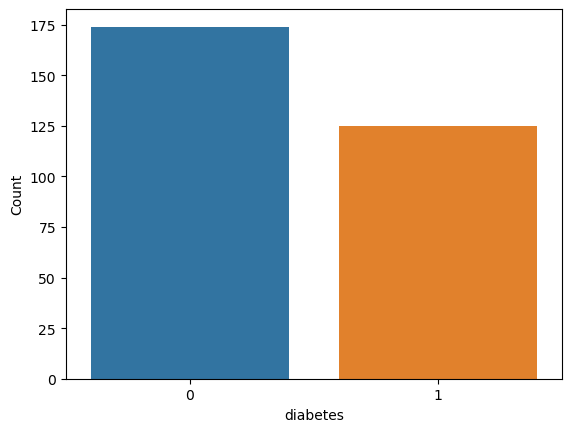

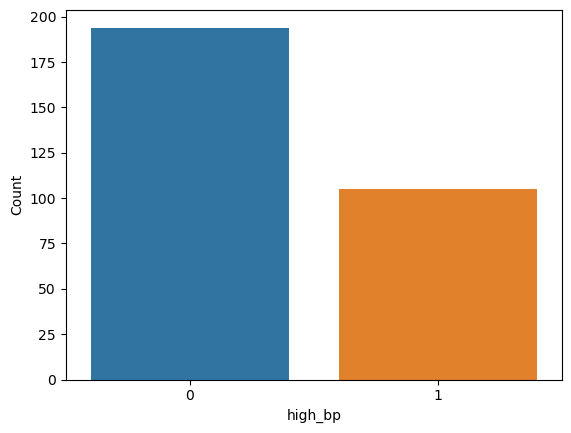

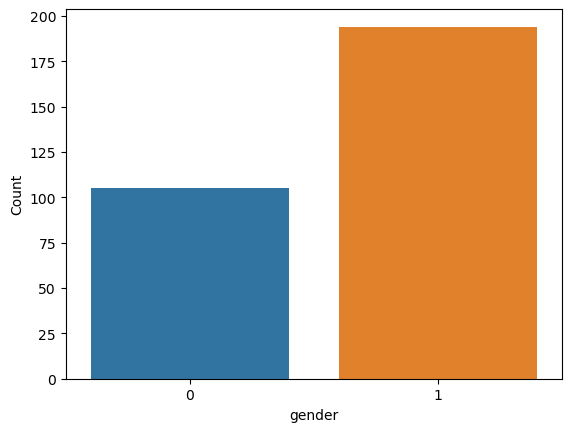

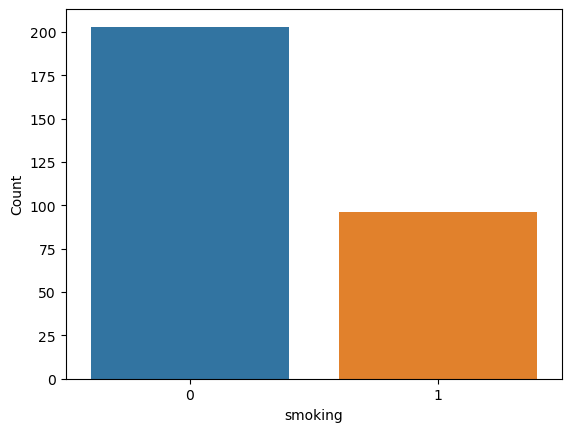

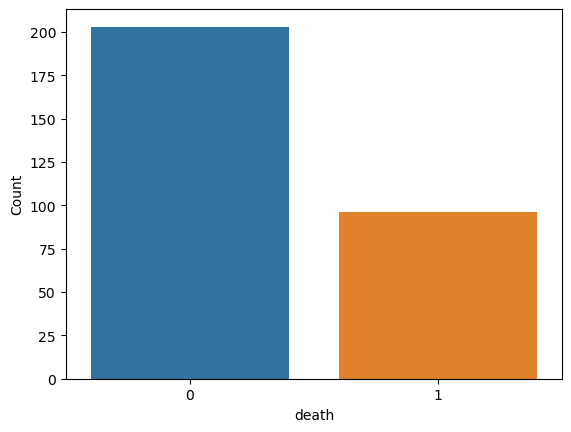

In [ ]:
for c in df[['anaemia','diabetes','high_bp','gender','smoking','death']]:
    sns.countplot(df[c])
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()

In [ ]:
df['death'].value_counts()

0    203
1     96
Name: death, dtype: int64

## VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
v=df.drop(['death'],axis=1)
vif=pd.DataFrame({'variables':v.columns})
vif['vif']=[variance_inflation_factor(v.values,i)
           for i in range(len(v.columns))]
vif

variables        vif
0                        age  29.114744
1                    anaemia   1.909994
2   creatinine_phosphokinase   1.448473
3                   diabetes   1.789419
4          ejection_fraction  12.081364
5                    high_bp   1.646044
6                  platelets   8.641813
7           serum_creatinine   2.919913
8               serum_sodium  59.151991
9                     gender   3.795155
10                   smoking   1.892753
11                      time   4.351441

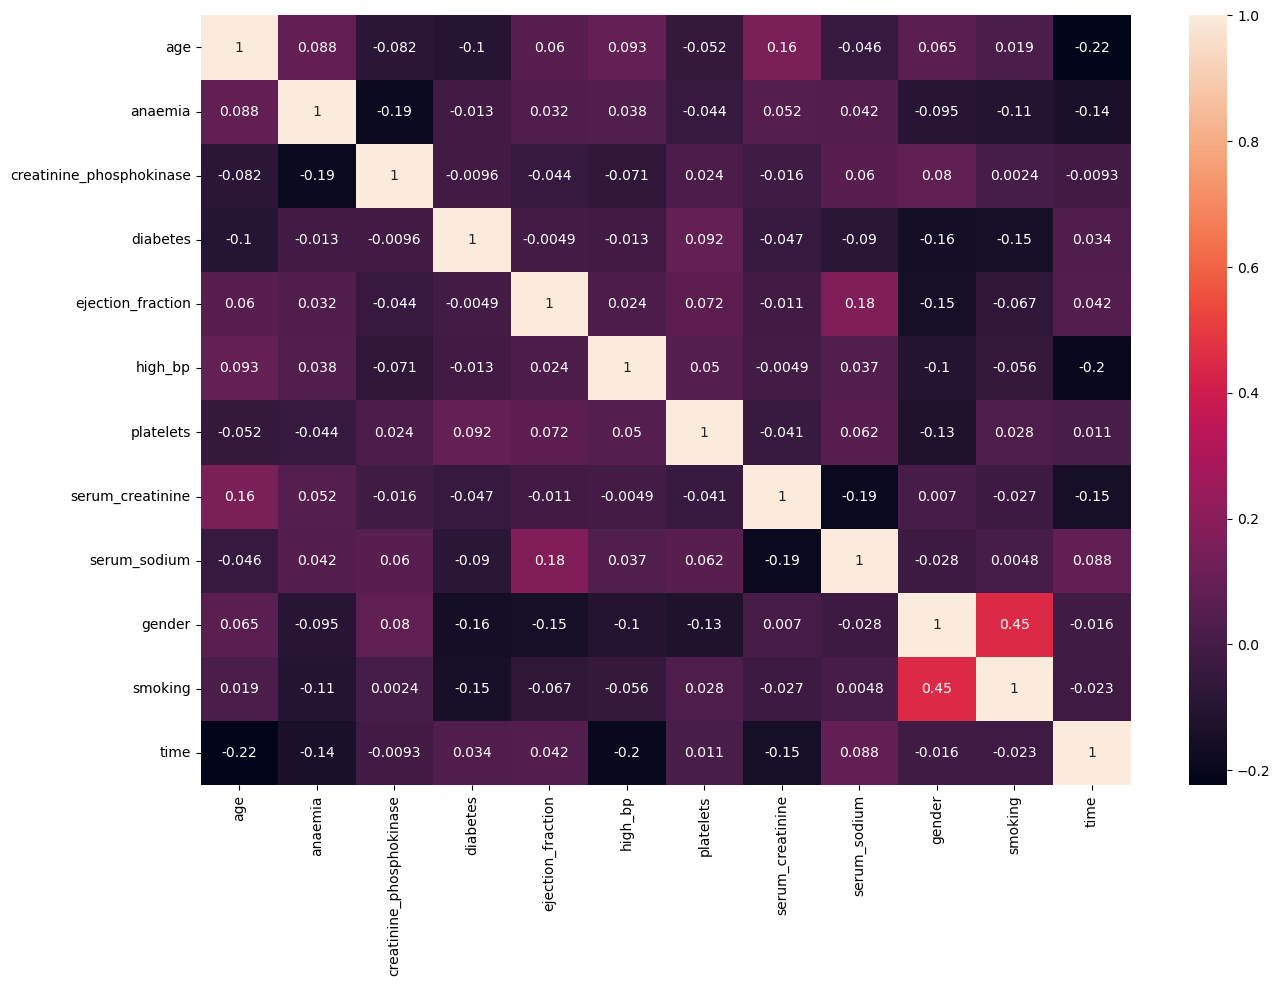

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap((df.drop(['death'],axis=1)).corr(),annot=True)
plt.show()

## Outlier Detection

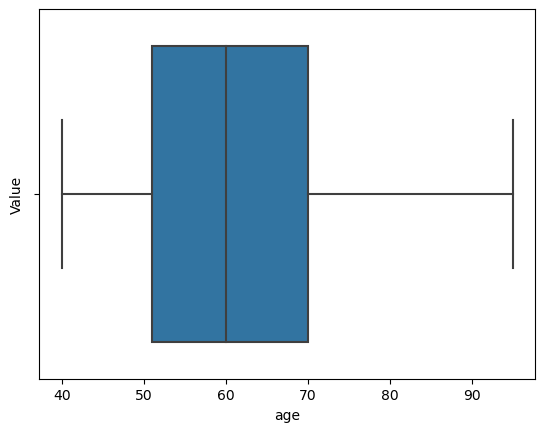

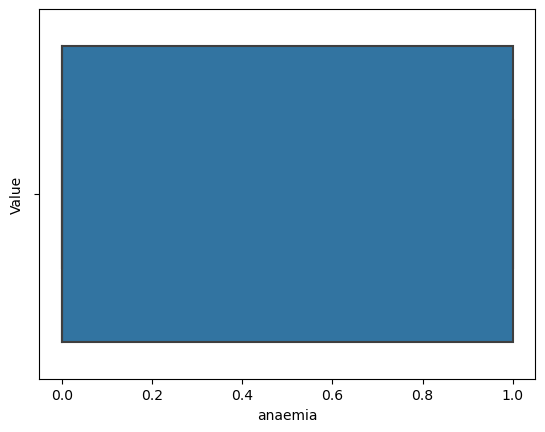

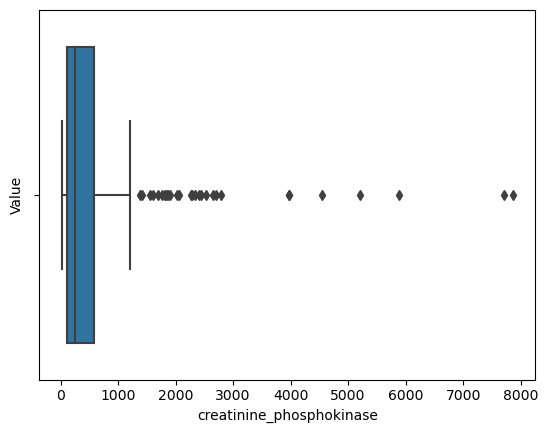

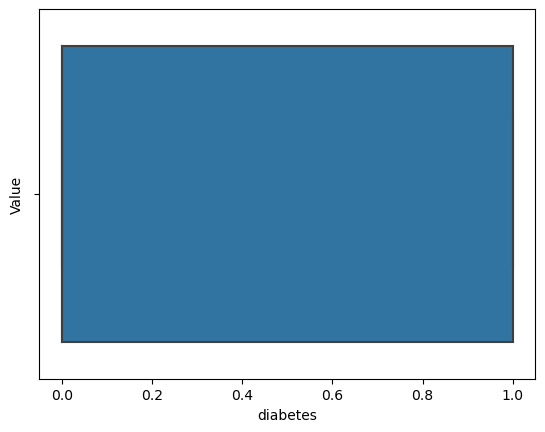

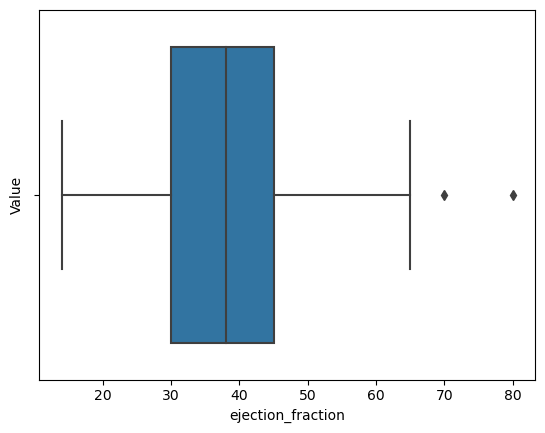

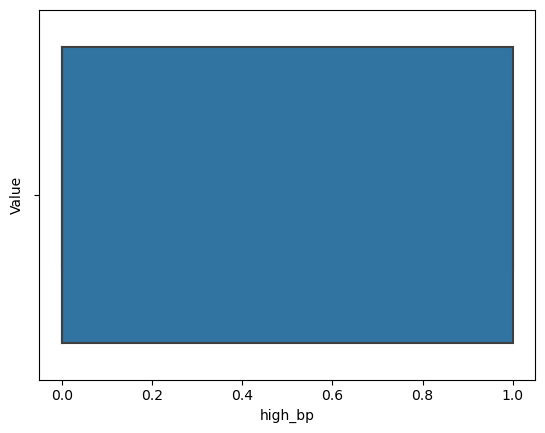

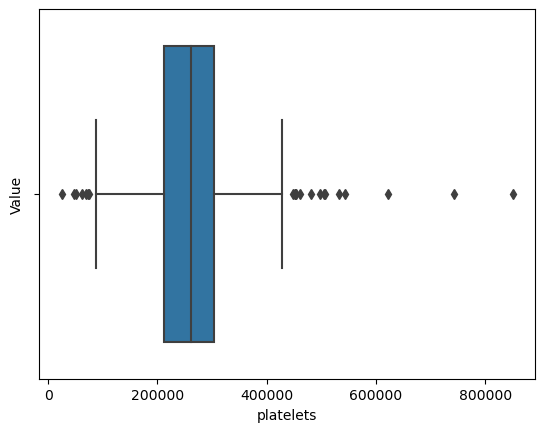

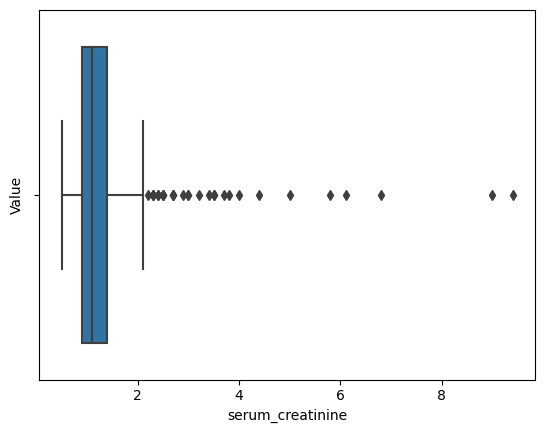

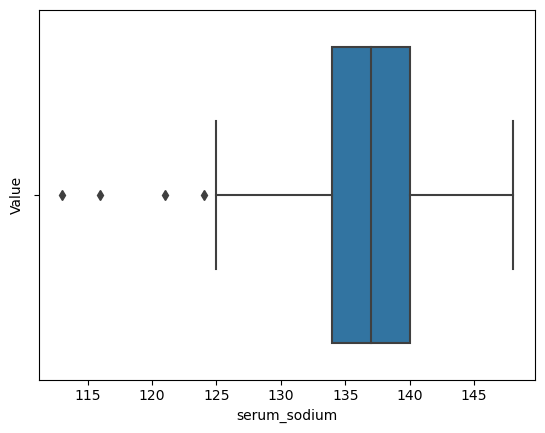

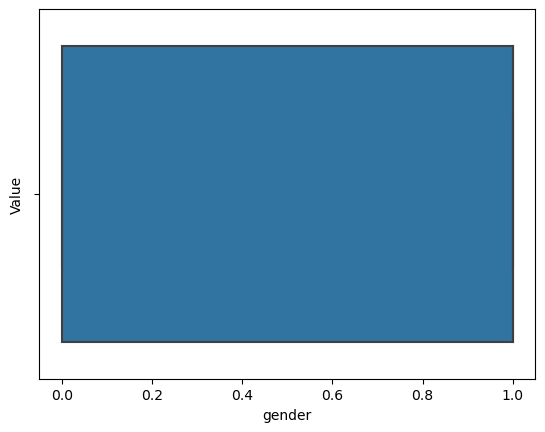

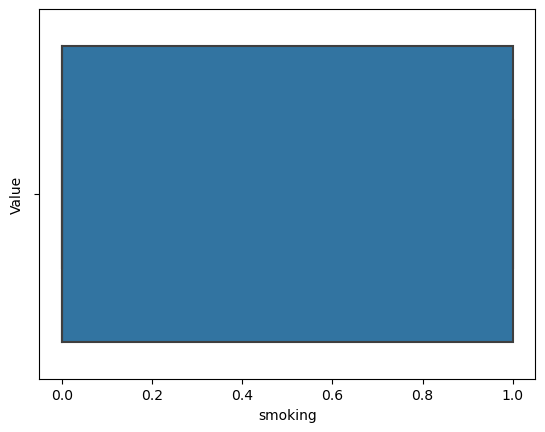

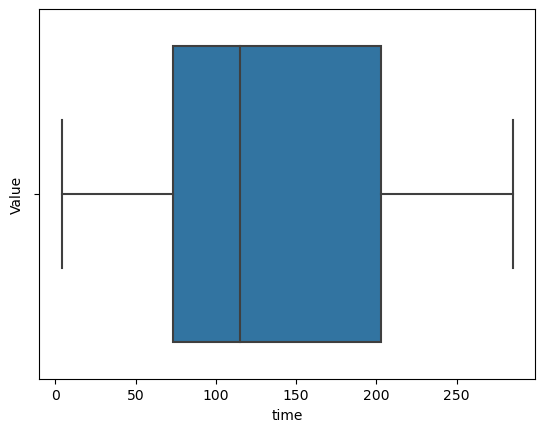

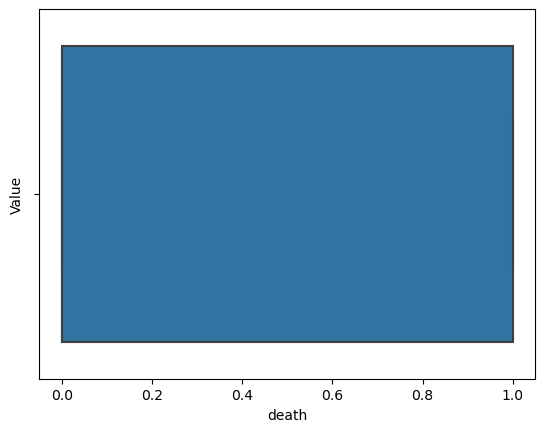

In [ ]:
for o in df.columns:
    sns.boxplot(df[o])
    plt.xlabel(o)
    plt.ylabel('Value')
    plt.show()

## Outlier treatment

In [ ]:
for z in df.columns:
    q1=np.percentile(df[z],25)
    q3=np.percentile(df[z],75)
    iqr=q3-q1
    lf=q1-(1.5*iqr)
    uf=q3+(1.5*iqr)
    df[z]=np.where(df[z]>uf,uf,
                  np.where(df[z]<lf,lf,df[z]))

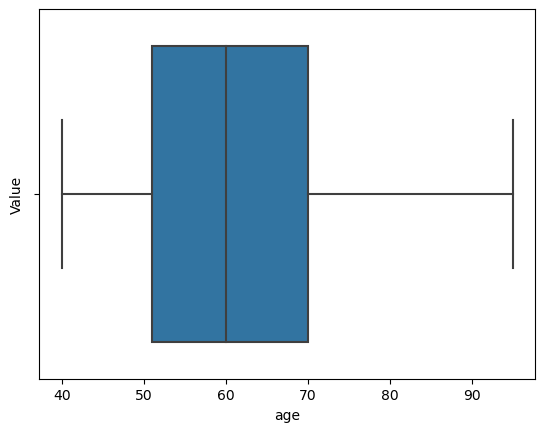

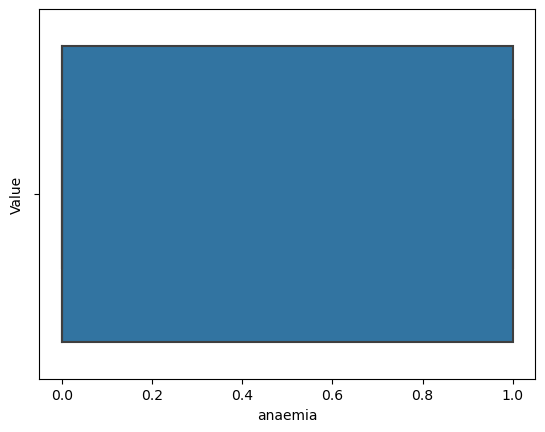

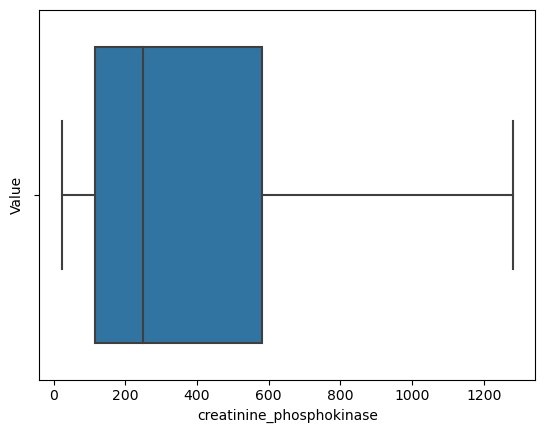

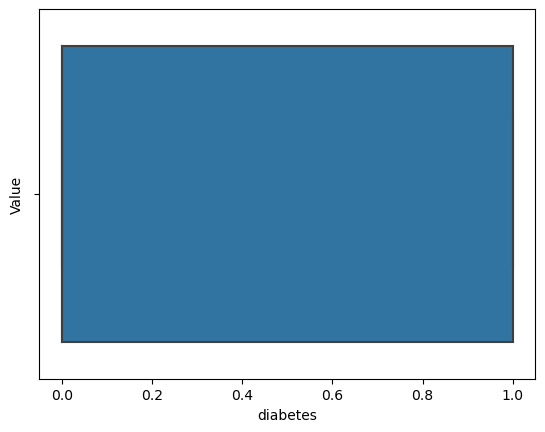

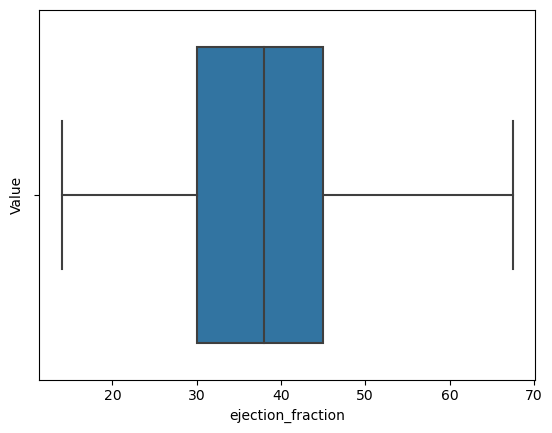

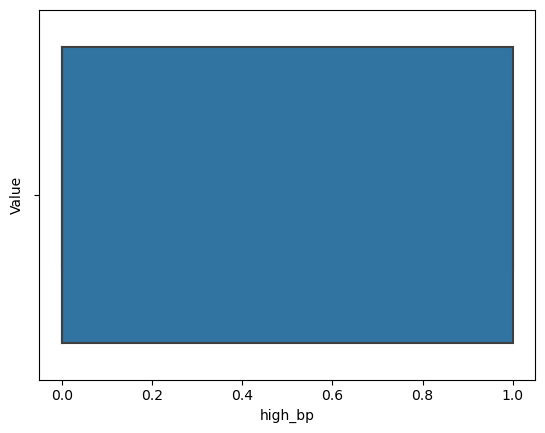

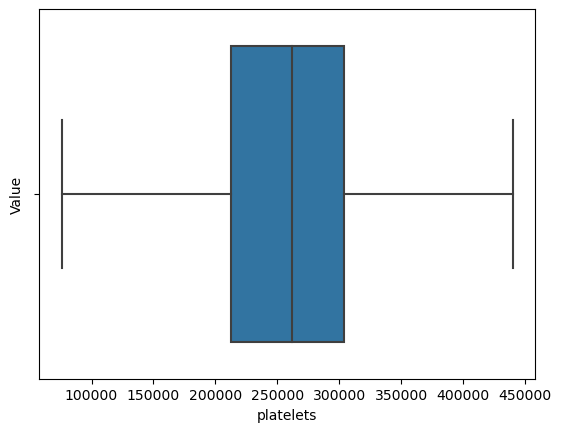

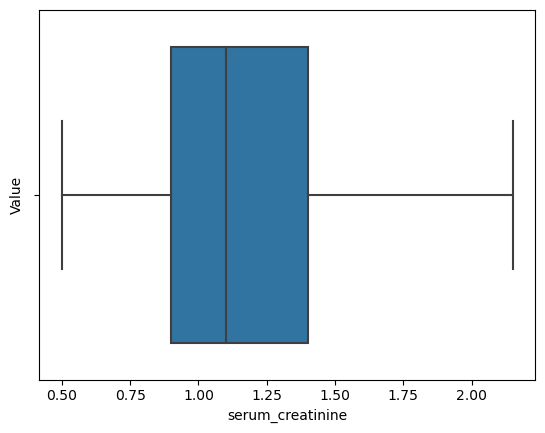

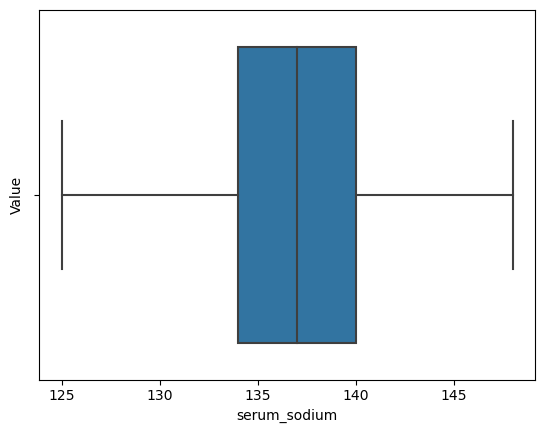

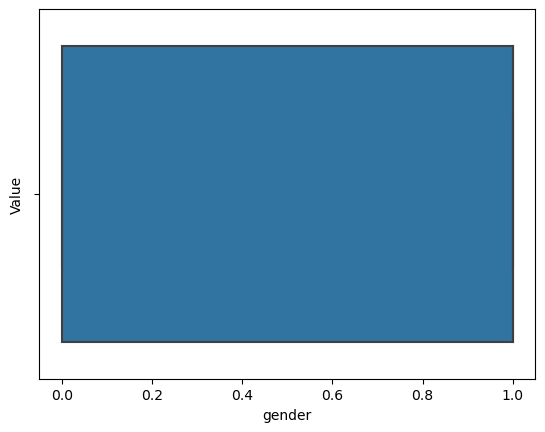

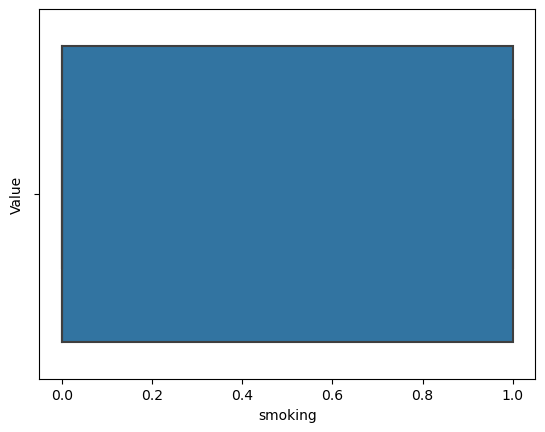

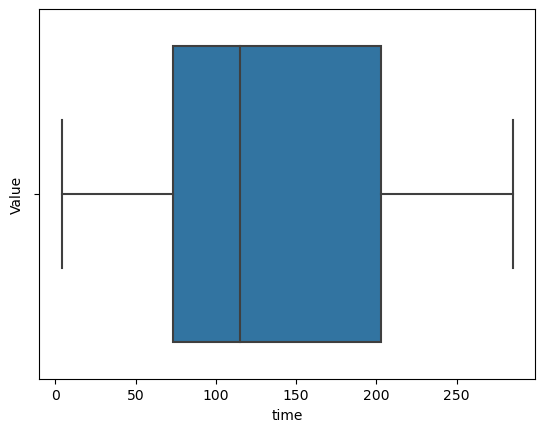

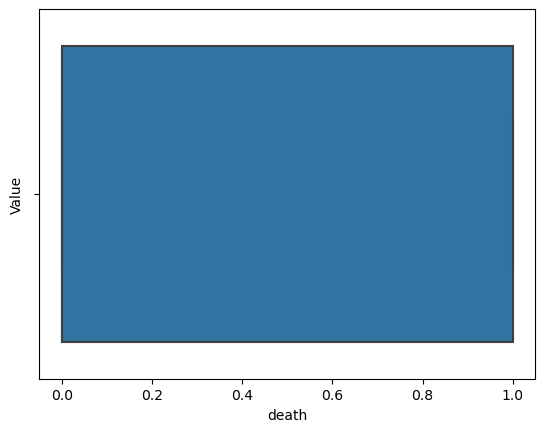

In [ ]:
for x in df.columns:
    sns.boxplot(df[x])
    plt.xlabel(x)
    plt.ylabel('Value')
    plt.show()

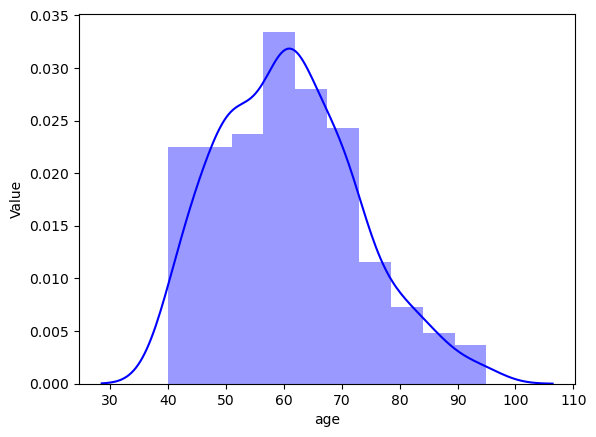

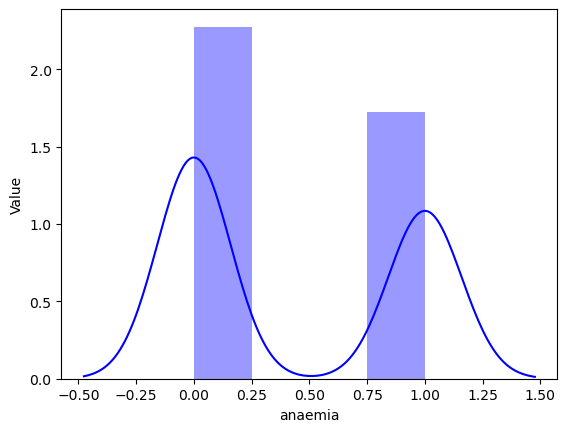

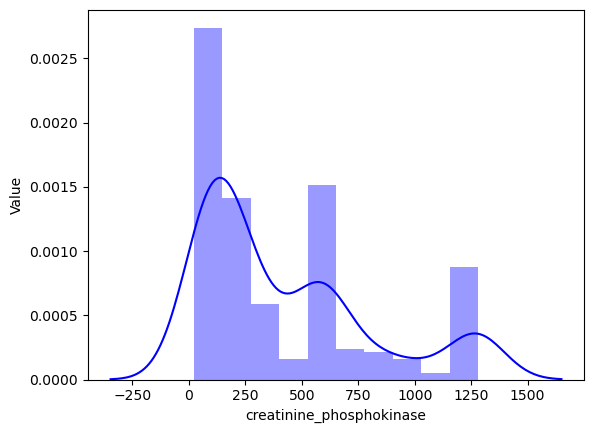

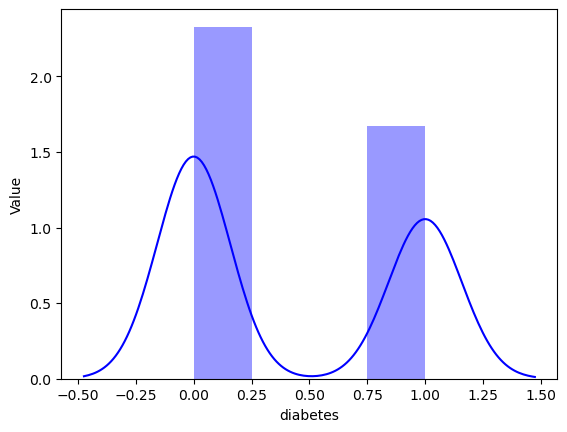

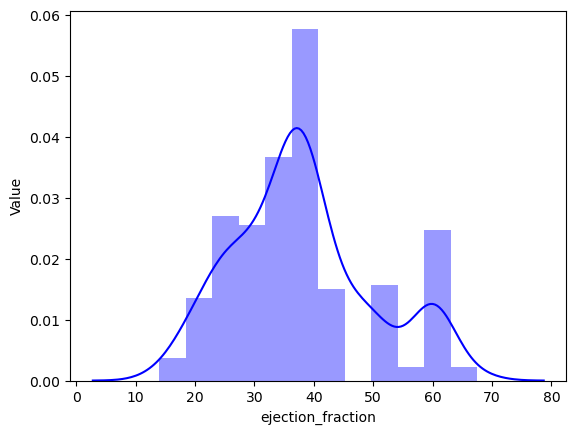

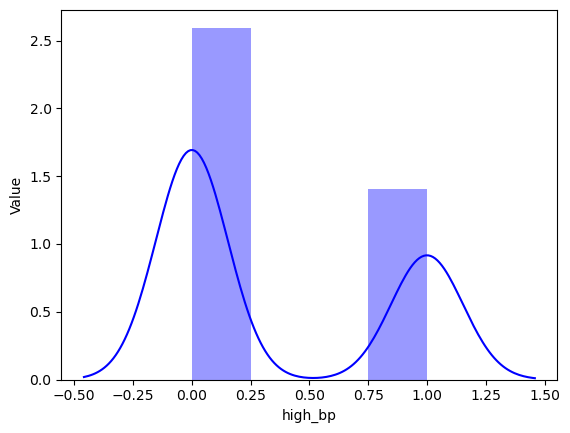

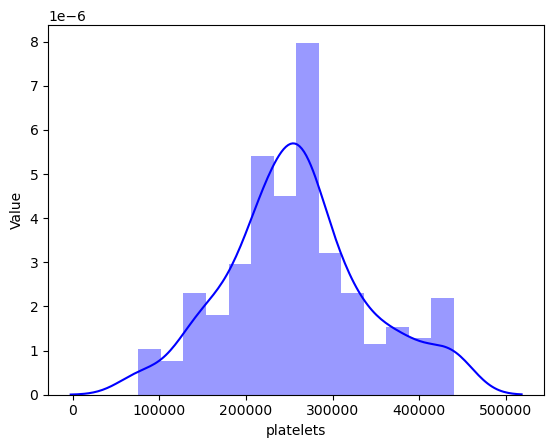

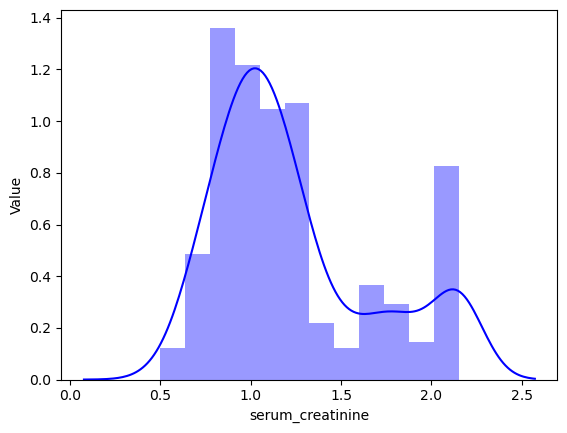

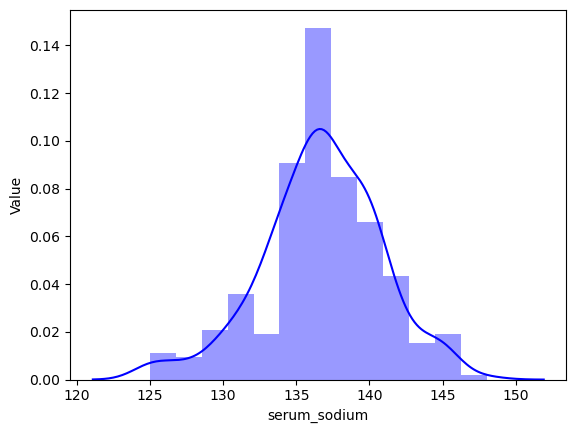

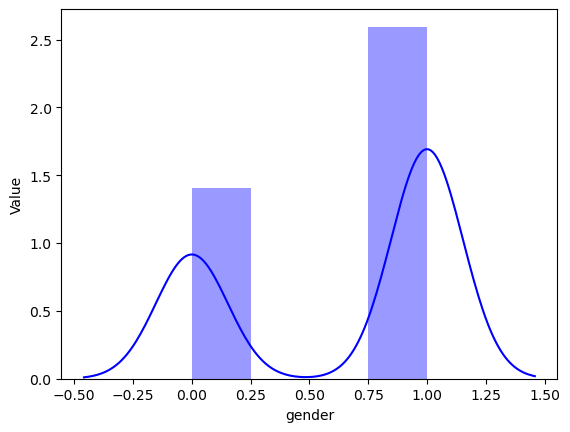

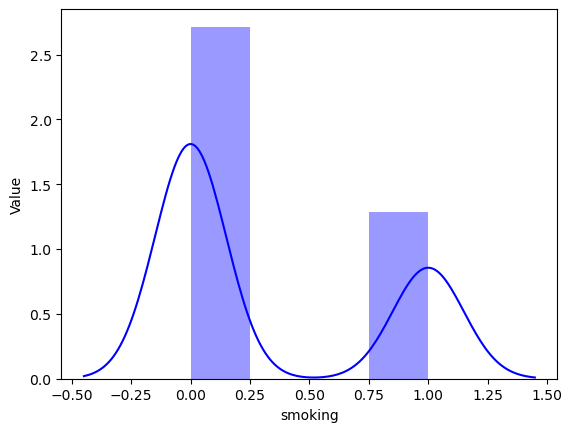

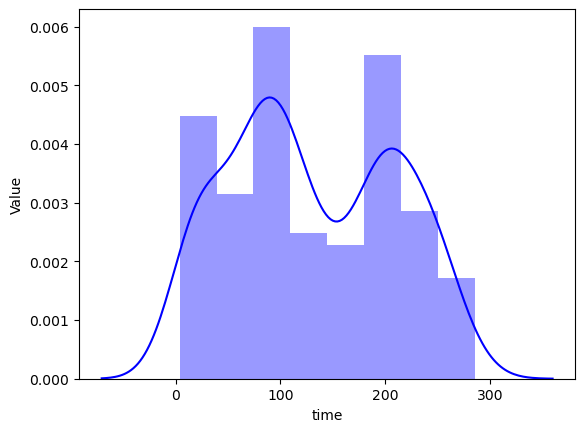

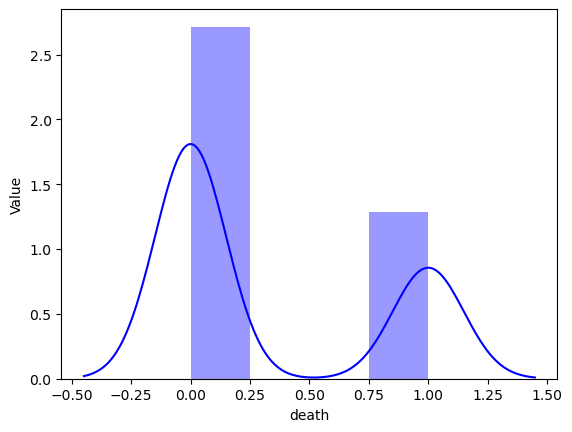

In [ ]:
for d1 in df.columns:
    sns.distplot(df[d1],color='blue')
    plt.xlabel(d1)
    plt.ylabel('Value')
    plt.show()

In [ ]:
X=df.drop(['death'],axis=1)
Y=df['death']

## Class Balancing

In [ ]:
!pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from imblearn.over_sampling import SMOTEN
from collections import Counter

In [ ]:
smn=SMOTEN()
X_res,Y_res=smn.fit_resample(X,Y)
X_res.shape,Y_res.shape

((406, 12), (406,))

In [ ]:
print('Before resampling {}'.format(Counter(Y)))
print('After resample {}'.format(Counter(Y_res)))

Before resampling Counter({0.0: 203, 1.0: 96})
After resample Counter({1.0: 203, 0.0: 203})


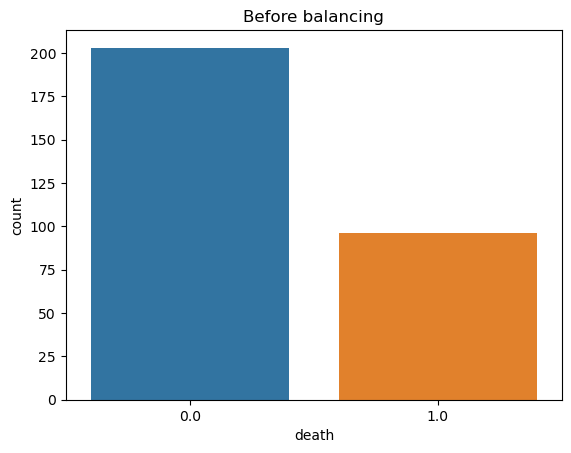

In [ ]:
sns.countplot(Y)
plt.title('Before balancing')
plt.show()

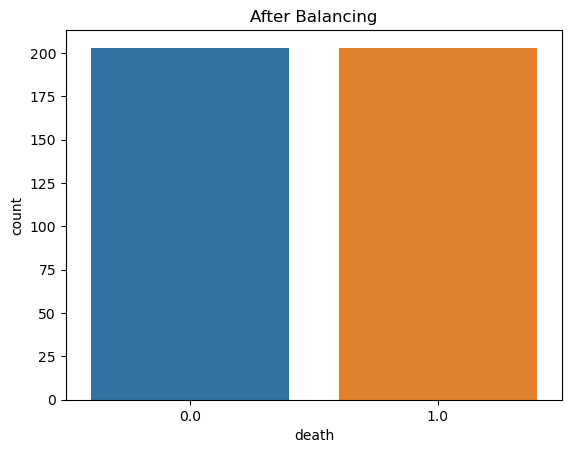

In [ ]:
sns.countplot(Y_res)
plt.title('After Balancing')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X1=std.fit_transform(X_res)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1,Y_res,train_size=0.8,random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((324, 12), (82, 12), (324,), (82,))

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(X1,Y_res,train_size=0.7,random_state=72)
x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape

((284, 12), (122, 12), (284,), (122,))

# LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,roc_curve,confusion_matrix
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pre=log.predict(x_test)

In [ ]:
log.score(x_test,y_test)

0.926829268292683

In [ ]:
log.score(x_train,y_train)

0.845679012345679

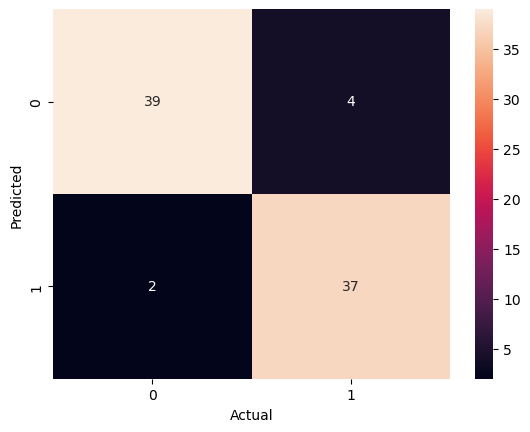

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93        43
         1.0       0.90      0.95      0.92        39

    accuracy                           0.93        82
   macro avg       0.93      0.93      0.93        82
weighted avg       0.93      0.93      0.93        82



In [ ]:
D=pd.DataFrame({'actual':y_test,'predicted':y_pre})
W=len(D.loc[D['actual']!=D['predicted']])
print('Total wrong predictions are : '+str(W))

Total wrong predictions are : 6


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(random_state=25)
dt.fit(x_train,y_train)
y_pre_dt=dt.predict(x_test)

In [ ]:
dt.score(x_test,y_test)

0.8902439024390244

In [ ]:
dt.score(x_train,y_train)

1.0

## Grid Search CV

In [ ]:
grid={'criterion':['entropy','gini'],
     'splitter':['best','random'],
     'min_samples_split':range(2,6,1),
     'min_samples_leaf':range(1,5,1),
     'max_depth':range(1,8),
     'ccp_alpha':np.random.rand(20)}

In [ ]:
gscv=GridSearchCV(estimator=dt,param_grid=grid,cv=10,n_jobs=1)
gscv.fit(x_train,y_train)
gscv.best_params_

{'ccp_alpha': 0.025918935539497867,
 'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'random'}

In [ ]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=6,splitter='best',min_samples_leaf=1,min_samples_split=3,
                          ccp_alpha= 0.025918935539497867,random_state=25)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.025918935539497867, max_depth=6,
                       min_samples_split=3, random_state=25)

In [ ]:
y_pre_dt1=dt1.predict(x_test)

In [ ]:
dt1.score(x_test,y_test)

0.8902439024390244

In [ ]:
dt1.score(x_train,y_train)

0.845679012345679

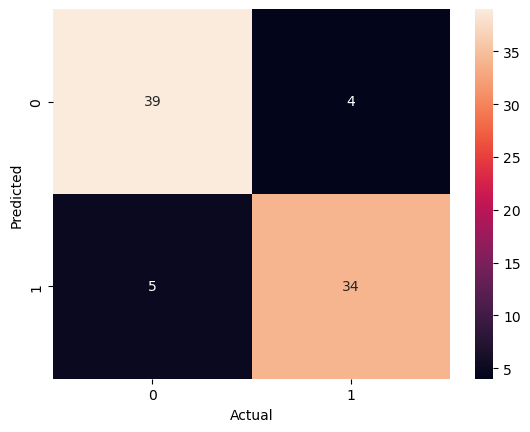

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre_dt1),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,y_pre_dt1))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90        43
         1.0       0.89      0.87      0.88        39

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82



In [ ]:
D1=pd.DataFrame({'actual':y_test,'predicted':y_pre_dt1})
W1=len(D1.loc[D1['actual']!=D1['predicted']])
print('Total wrong predictions are : '+str(W1))

Total wrong predictions are : 9


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
lis=[50,55,45,60,65,45,69,66,70,75,80,88,85,92,90,95,99]
for r in lis:
    ran1=RandomForestClassifier(n_estimators=r,random_state=11)
    ran1.fit(x_train,y_train)
    y_pre_r=ran1.predict(x_test)
    print('for n_estimetor = ',r,'the accuracy is = '+str(accuracy_score(y_test,y_pre_r)))

for n_estimetor =  50 the accuracy is = 0.926829268292683
for n_estimetor =  55 the accuracy is = 0.9512195121951219
for n_estimetor =  45 the accuracy is = 0.9512195121951219
for n_estimetor =  60 the accuracy is = 0.9390243902439024
for n_estimetor =  65 the accuracy is = 0.926829268292683
for n_estimetor =  45 the accuracy is = 0.9512195121951219
for n_estimetor =  69 the accuracy is = 0.926829268292683
for n_estimetor =  66 the accuracy is = 0.926829268292683
for n_estimetor =  70 the accuracy is = 0.926829268292683
for n_estimetor =  75 the accuracy is = 0.926829268292683
for n_estimetor =  80 the accuracy is = 0.926829268292683
for n_estimetor =  88 the accuracy is = 0.9146341463414634
for n_estimetor =  85 the accuracy is = 0.9146341463414634
for n_estimetor =  92 the accuracy is = 0.926829268292683
for n_estimetor =  90 the accuracy is = 0.926829268292683
for n_estimetor =  95 the accuracy is = 0.926829268292683
for n_estimetor =  99 the accuracy is = 0.926829268292683


In [ ]:
ran=RandomForestClassifier(n_estimators=55,random_state=11)
ran.fit(x_train,y_train)

RandomForestClassifier(n_estimators=55, random_state=11)

In [ ]:
y_pre_rf=ran.predict(x_test)

In [ ]:
ran.score(x_test,y_test)

0.9512195121951219

In [ ]:
ran.score(x_train,y_train)

1.0

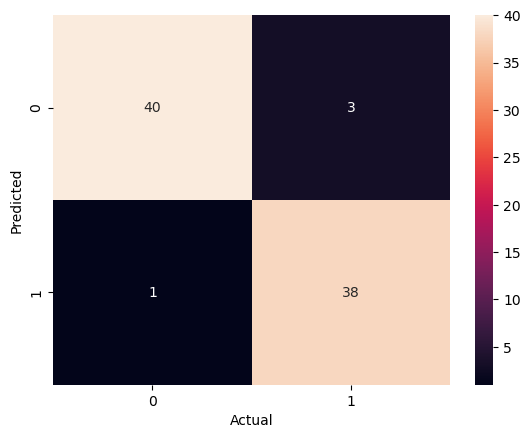

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre_rf),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,y_pre_rf))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.93      0.97      0.95        39

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [ ]:
D2=pd.DataFrame({'actual':y_test,'predicted':y_pre_rf})
W2=len(D2.loc[D2['actual']!=D2['predicted']])
print('Total wrong predictions are : '+str(W2))

Total wrong predictions are : 4


# SVM
## RBF

In [ ]:
from sklearn.svm import SVC
ga=[0.1,0.01,0.2,0.3,0.4,0.5,0.6,0.7,0.8,'auto']
for r in ga:
    sc1=SVC(gamma=r)
    sc1.fit(x_train,y_train)
    y_p=sc1.predict(x_test)
    print('for the gamma value ',r,' accuracy is = '+str(accuracy_score(y_test,y_p)))


for the gamma value  0.1  accuracy is = 0.9146341463414634
for the gamma value  0.01  accuracy is = 0.9390243902439024
for the gamma value  0.2  accuracy is = 0.9146341463414634
for the gamma value  0.3  accuracy is = 0.8658536585365854
for the gamma value  0.4  accuracy is = 0.8902439024390244
for the gamma value  0.5  accuracy is = 0.8536585365853658
for the gamma value  0.6  accuracy is = 0.8292682926829268
for the gamma value  0.7  accuracy is = 0.8048780487804879
for the gamma value  0.8  accuracy is = 0.7926829268292683
for the gamma value  auto  accuracy is = 0.9024390243902439


In [ ]:
Sc1=SVC(kernel='rbf',gamma=0.01,random_state=5)
Sc1.fit(x_train,y_train)
y_pre_Sc1=Sc1.predict(x_test)

In [ ]:
Sc1.score(x_test,y_test)

0.9390243902439024

In [ ]:
Sc1.score(x_train,y_train)

0.8549382716049383

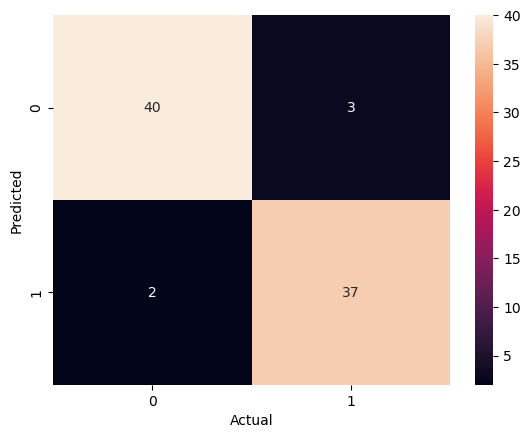

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre_Sc1),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,y_pre_Sc1))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.93      0.95      0.94        39

    accuracy                           0.94        82
   macro avg       0.94      0.94      0.94        82
weighted avg       0.94      0.94      0.94        82



In [ ]:
D3=pd.DataFrame({'actual':y_test,'predicted':y_pre_Sc1})
W3=len(D3.loc[D3['actual']!=D3['predicted']])
print('Total wrong predictions are : '+str(W3))

Total wrong predictions are : 5


## Linear

In [ ]:
Sc2=SVC(kernel='linear')
Sc2.fit(x_train,y_train)
y_pre_Sc2=Sc2.predict(x_test)

In [ ]:
Sc2.score(x_test,y_test)

0.9512195121951219

In [ ]:
Sc2.score(x_train,y_train)

0.8518518518518519

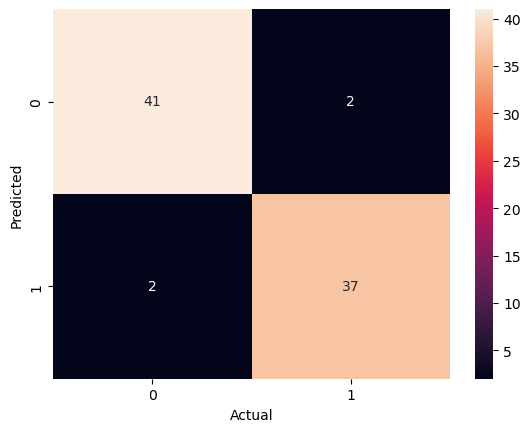

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre_Sc2),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,y_pre_Sc2))

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        43
         1.0       0.95      0.95      0.95        39

    accuracy                           0.95        82
   macro avg       0.95      0.95      0.95        82
weighted avg       0.95      0.95      0.95        82



In [ ]:
D4=pd.DataFrame({'actual':y_test,'predicted':y_pre_Sc2})
W4=len(D4.loc[D4['actual']!=D4['predicted']])
print('Total wrong predictions are : '+str(W4))

Total wrong predictions are : 4


## Poly

In [ ]:
for p in range(1,8):
    sc3=SVC(kernel='poly',degree=p,random_state=0)
    sc3.fit(x_train,y_train)
    print('for ',p,' accuracy is '+str(sc3.score(x_test,y_test)))



for  1  accuracy is 0.9390243902439024
for  2  accuracy is 0.7073170731707317
for  3  accuracy is 0.926829268292683
for  4  accuracy is 0.7317073170731707
for  5  accuracy is 0.926829268292683
for  6  accuracy is 0.7073170731707317
for  7  accuracy is 0.9146341463414634


In [ ]:
Sc3=SVC(kernel='poly',degree=1,random_state=0)
Sc3.fit(x_train,y_train)
y_pre_Sc3=Sc3.predict(x_test)

In [ ]:
Sc3.score(x_test,y_test)

0.9390243902439024

In [ ]:
Sc3.score(x_train,y_train)

0.8580246913580247

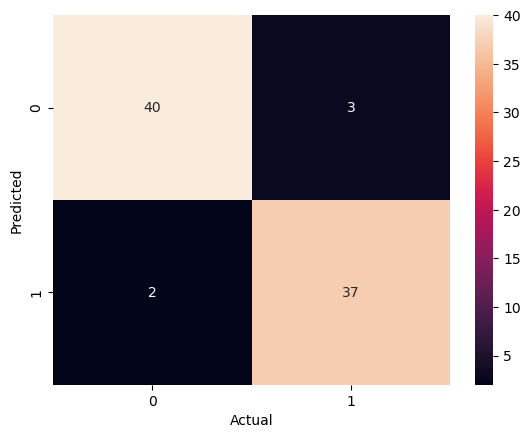

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre_Sc3),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,y_pre_Sc3))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.93      0.95      0.94        39

    accuracy                           0.94        82
   macro avg       0.94      0.94      0.94        82
weighted avg       0.94      0.94      0.94        82



In [ ]:
D5=pd.DataFrame({'actual':y_test,'predicted':y_pre_Sc3})
W5=len(D5.loc[D5['actual']!=D5['predicted']])
print('Total wrong predictions are : '+str(W5))

Total wrong predictions are : 5


## Sigmoid

In [ ]:
Sc4=SVC(kernel='sigmoid',random_state=2)
Sc4.fit(x_train,y_train)
y_pre_Sc4=Sc4.predict(x_test)

In [ ]:
Sc4.score(x_test,y_test)

0.9390243902439024

In [ ]:
Sc4.score(x_train,y_train)

0.7962962962962963

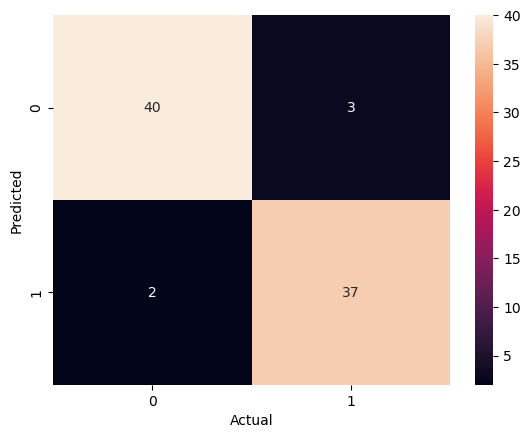

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre_Sc4),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,y_pre_Sc4))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.93      0.95      0.94        39

    accuracy                           0.94        82
   macro avg       0.94      0.94      0.94        82
weighted avg       0.94      0.94      0.94        82



In [ ]:
D6=pd.DataFrame({'actual':y_test,'predicted':y_pre_Sc4})
W6=len(D6.loc[D6['actual']!=D6['predicted']])
print('Total wrong predictions are : '+str(W6))

Total wrong predictions are : 5


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(2,10,1):
    KNN=KNeighborsClassifier(n_neighbors=k)
    KNN.fit(x_train,y_train)
    print('for neighbors = ',k,' the accuracy is = '+str(KNN.score(x_test,y_test)))


for neighbors =  2  the accuracy is = 0.8536585365853658
for neighbors =  3  the accuracy is = 0.8780487804878049
for neighbors =  4  the accuracy is = 0.8536585365853658
for neighbors =  5  the accuracy is = 0.8414634146341463
for neighbors =  6  the accuracy is = 0.8048780487804879
for neighbors =  7  the accuracy is = 0.8170731707317073
for neighbors =  8  the accuracy is = 0.8170731707317073
for neighbors =  9  the accuracy is = 0.8414634146341463


In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pre_knn=knn.predict(x_test)

In [ ]:
knn.score(x_test,y_test)

0.8780487804878049

In [ ]:
knn.score(x_train,y_train)

0.8888888888888888

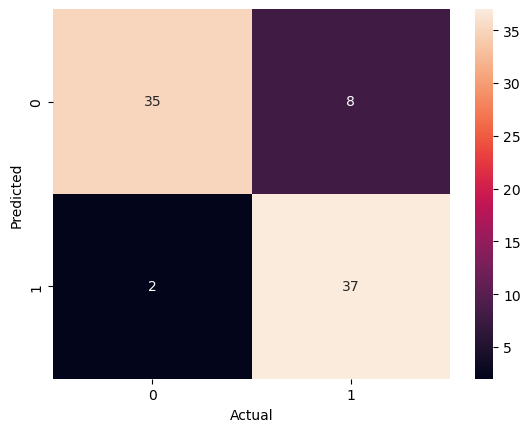

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre_knn),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,y_pre_knn))

              precision    recall  f1-score   support

         0.0       0.95      0.81      0.88        43
         1.0       0.82      0.95      0.88        39

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.89      0.88      0.88        82



In [ ]:
D7=pd.DataFrame({'actual':y_test,'predicted':y_pre_knn})
W7=len(D7.loc[D7['actual']!=D7['predicted']])
print('Total wrong predictions are : '+str(W7))

Total wrong predictions are : 10


# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pre_nb=nb.predict(x_test)

In [ ]:
nb.score(x_test,y_test)

0.8902439024390244

In [ ]:
nb.score(x_train,y_train)

0.8271604938271605

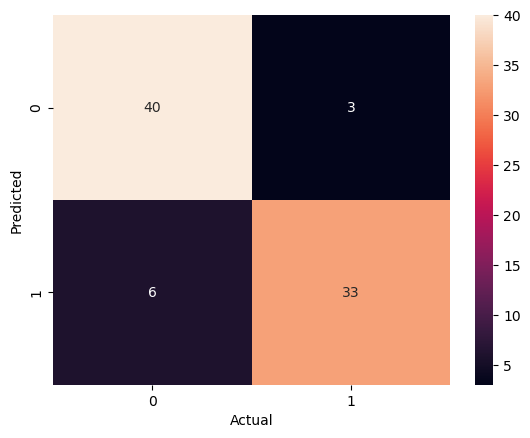

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre_nb),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,y_pre_nb))

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90        43
         1.0       0.92      0.85      0.88        39

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82



In [ ]:
D8=pd.DataFrame({'actual':y_test,'predicted':y_pre_nb})
W8=len(D8.loc[D8['actual']!=D8['predicted']])
print('Total wrong predictions are : '+str(W8))

Total wrong predictions are : 9


# Ensemble Technique
# Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
ran1=RandomForestClassifier(n_estimators=45,random_state=11)
ran2=RandomForestClassifier(n_estimators=60,random_state=11)
est1=(('ran',ran),('liner',Sc2),('ran1',ran1))
est2=(('ran',ran),('ran1',ran1))
lis3=[est1,est2]
lis4=['hard','soft']
for l in lis3:
    vc=VotingClassifier(estimators=l)
    vc.fit(x_train,y_train)
    print('for est = {} '.format(l),' the accuracy is = '+str(vc.score(x_test,y_test)))
    print()


for est = (('ran', RandomForestClassifier(n_estimators=55, random_state=11)), ('liner', SVC(kernel='linear')), ('ran1', RandomForestClassifier(n_estimators=45, random_state=11)))   the accuracy is = 0.9634146341463414

for est = (('ran', RandomForestClassifier(n_estimators=55, random_state=11)), ('ran1', RandomForestClassifier(n_estimators=45, random_state=11)))   the accuracy is = 0.9634146341463414



In [ ]:
Vc=VotingClassifier(estimators=est1)
Vc.fit(x_train,y_train)
y_pre_Vc=Vc.predict(x_test)

In [ ]:
Vc.score(x_test,y_test)

0.9634146341463414

In [ ]:
Vc.score(x_train,y_train)

1.0

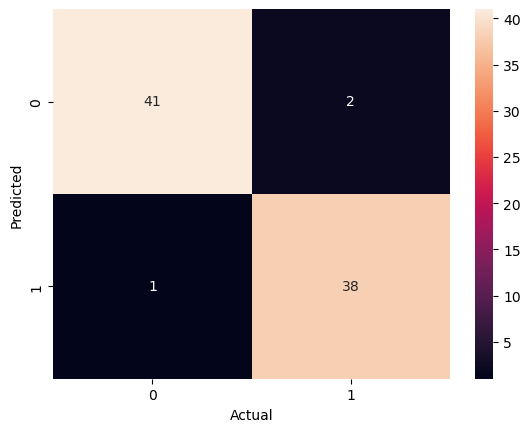

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre_Vc),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,y_pre_Vc))


              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.95      0.97      0.96        39

    accuracy                           0.96        82
   macro avg       0.96      0.96      0.96        82
weighted avg       0.96      0.96      0.96        82



In [ ]:
D9=pd.DataFrame({'actual':y_test,'predicted':y_pre_Vc})
W9=len(D9.loc[D9['actual']!=D9['predicted']])
print('Total wrong predictions are : '+str(W9))

Total wrong predictions are : 3


# Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier
es=[log,ran,Sc1,Sc3]
samples=[0.5,0.8,1.0]
features=[0.5,0.8,1.0]
for e in range(10,50,10):
    for f in features:
        for e1 in es:
            bag1=BaggingClassifier(n_estimators=e,base_estimator=e1,
                                       max_features=f,random_state=0)
            bag1.fit(x_train,y_train)
            print('model = {} , n_estimetor={}  ,feature={}'.format(e1,e,f),
                  ' accuracy is = '+str(bag1.score(x_test,y_test)))
            print()


    RandomForestClassifier(n_estimators=55, random_state=11) , n_estimetor=10  ,feature=0.5  accuracy is = 0.975609756097561

model = LogisticRegression() , n_estimetor=10  ,feature=0.5  accuracy is = 0.926829268292683

model = RandomForestClassifier(n_estimators=55, random_state=11) , n_estimetor=10  ,feature=0.5  accuracy is = 0.975609756097561

model = SVC(gamma=0.01, random_state=5) , n_estimetor=10  ,feature=0.5  accuracy is = 0.9512195121951219

model = SVC(degree=1, kernel='poly', random_state=0) , n_estimetor=10  ,feature=0.5  accuracy is = 0.9390243902439024

model = LogisticRegression() , n_estimetor=10  ,feature=0.8  accuracy is = 0.9390243902439024

model = RandomForestClassifier(n_estimators=55, random_state=11) , n_estimetor=10  ,feature=0.8  accuracy is = 0.9634146341463414

model = SVC(gamma=0.01, random_state=5) , n_estimetor=10  ,feature=0.8  accuracy is = 0.926829268292683

model = SVC(degree=1, kernel='poly', random_state=0) , n_estimetor=10  ,feature=0.8  accuracy is = 0.9390243902439024

model = LogisticRegression() , n_estimetor=10  ,feature=1.0  accuracy is = 0.926829268292683

model =

In [ ]:
bag=BaggingClassifier(base_estimator=ran,n_estimators=10,max_features=0.5,random_state=0)
bag.fit(x_train,y_train)
y_pre_bag=bag.predict(x_test)

In [ ]:
bag.score(x_test,y_test)

0.975609756097561

In [ ]:
bag.score(x_train,y_train)

0.9938271604938271

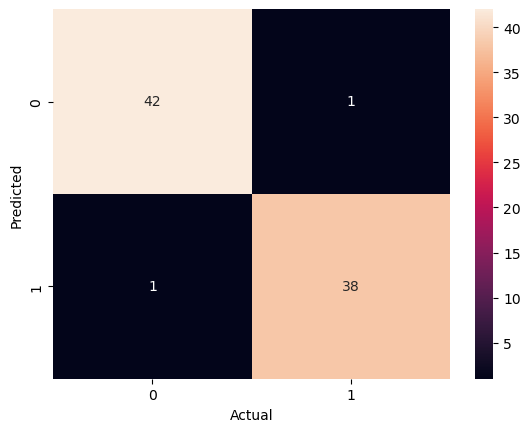

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pre_bag),annot=True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
print(classification_report(y_test,y_pre_bag))


              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        43
         1.0       0.97      0.97      0.97        39

    accuracy                           0.98        82
   macro avg       0.98      0.98      0.98        82
weighted avg       0.98      0.98      0.98        82



In [ ]:
D10=pd.DataFrame({'actual':y_test,'predicted':y_pre_bag})
W10=len(D10.loc[D10['actual']!=D10['predicted']])
print('Total wrong predictions are : '+str(W10))

Total wrong predictions are : 2


# Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
!pip install XGBoost

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import xgboost
from xgboost import XGBClassifier
ada=AdaBoostClassifier(base_estimator=ran)
gr=GradientBoostingClassifier(loss='exponential')
xg=XGBClassifier()
l3=[ada,gr,xg]
for i in l3:
    i.fit(x_train,y_train)
    print('model = {}'.format(i),' ----- > accuracy =  '+str(i.score(x_test,y_test)),' and training accuracy = '+str(i.score(x_train,y_train)))
    print()

model = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=55,
                                                         random_state=11))  ----- > accuracy =  0.9512195121951219  and training accuracy = 1.0

model = GradientBoostingClassifier(loss='exponential')  ----- > accuracy =  0.926829268292683  and training accuracy = 1.0

model = XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
            

In [ ]:
y_pre_ada=ada.predict(x_test)
y_pre_gr=gr.predict(x_test)
y_pre_xg=xg.predict(x_test)
D11=pd.DataFrame({'actual':y_test,'predicted':y_pre_ada})
W11=len(D11.loc[D11['actual']!=D11['predicted']])
D12=pd.DataFrame({'actual':y_test,'predicted':y_pre_gr})
W12=len(D12.loc[D12['actual']!=D12['predicted']])
D13=pd.DataFrame({'actual':y_test,'predicted':y_pre_xg})
W13=len(D13.loc[D13['actual']!=D13['predicted']])
print('Total wrong predictions are [Ada Boost] : '+str(W11))
print('Total wrong predictions are [Gradient Boost] : '+str(W12))
print('Total wrong predictions are [XG Boost] : '+str(W13))

Total wrong predictions are [Ada Boost] : 4
Total wrong predictions are [Gradient Boost] : 6
Total wrong predictions are [XG Boost] : 4


## ROC Curve :

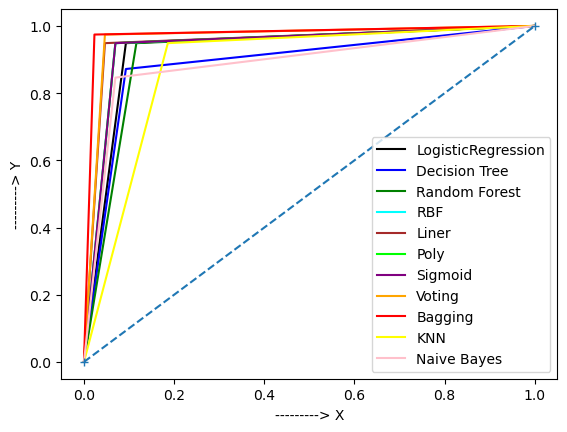

In [ ]:
t_log,f_log,th_log=roc_curve(y_test,y_pre)
t_dt1,f_dt1,th_dt1=roc_curve(y_test,y_pre_dt1)
t_ran1,f_ran1,th_ran1=roc_curve(y_test,y_p_rf)
t_Sc1,f_Sc1,th_Sc1=roc_curve(y_test,y_pre_Sc1)
t_Sc2,f_Sc2,th_Sc2=roc_curve(y_test,y_pre_Sc2)
t_Sc3,f_Sc3,th_Sc3=roc_curve(y_test,y_pre_Sc3)
t_Sc4,f_Sc4,th_Sc4=roc_curve(y_test,y_pre_Sc4)
t_knn,f_knn,th_knn=roc_curve(y_test,y_pre_knn)
t_nb,f_nb,th_nb=roc_curve(y_test,y_pre_nb)
t_v,f_v,th_v=roc_curve(y_test,y_pre_Vc)
t_bag,f_bag,th_bag=roc_curve(y_test,y_pre_bag)
plt.plot(t_log,f_log,color='black',label='LogisticRegression')
plt.plot(t_dt1,f_dt1,color='blue',label='Decision Tree')
plt.plot(t_ran1,f_ran1,color='green',label='Random Forest')
plt.plot(t_Sc1,f_Sc1,color='cyan',label='RBF')
plt.plot(t_Sc2,f_Sc2,color='brown',label='Liner')
plt.plot(t_Sc3,f_Sc3,color='lime',label='Poly')
plt.plot(t_Sc4,f_Sc4,color='purple',label='Sigmoid')
plt.plot(t_v,f_v,color='orange',label='Voting')
plt.plot(t_bag,f_bag,color='red',label='Bagging')
plt.plot(t_knn,f_knn,color='yellow',label='KNN')
plt.plot(t_nb,f_nb,color='pink',label='Naive Bayes')
plt.plot([0,1],'--',marker='+')
plt.xlabel('---------> X')
plt.ylabel('---------> Y')
plt.legend()
plt.show()

## Model 1

In [ ]:
from keras.layers import Dense


In [ ]:
model=keras.Sequential()
model.add(Dense(8,input_dim=12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
11/11 [==============================] - 5s 52ms/step - loss: 0.8070 - accuracy: 0.5247 - val_loss: 0.7780 - val_accuracy: 0.4878
Epoch 2/50
11/11 [==============================] - 0s 20ms/step - loss: 0.7711 - accuracy: 0.5432 - val_loss: 0.7453 - val_accuracy: 0.5000
Epoch 3/50
11/11 [==============================] - 0s 19ms/step - loss: 0.7390 - accuracy: 0.5525 - val_loss: 0.7147 - val_accuracy: 0.5122
Epoch 4/50
11/11 [==============================] - 0s 16ms/step - loss: 0.7081 - accuracy: 0.5586 - val_loss: 0.6870 - val_accuracy: 0.5122
Epoch 5/50
11/11 [==============================] - 0s 19ms/step - loss: 0.6819 - accuracy: 0.5710 - val_loss: 0.6611 - val_accuracy: 0.5122
Epoch 6/50
11/11 [==============================] - 0s 14ms/step - loss: 0.6585 - accuracy: 0.5957 - val_loss: 0.6377 - val_accuracy: 0.5610
Epoch 7/50
11/11 [==============================] - 0s 20ms/step - loss: 0.6365 - accuracy: 0.6173 - val_loss: 0.6165 - val_accuracy: 0.5976
Epoch 8/50
11

In [ ]:
y_pre1=model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 9ms/step - loss: 0.2920 - accuracy: 0.8902


In [ ]:
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

## Model 2

In [ ]:
callback=EarlyStopping(monitor='val_accuracy',min_delta=0.00001,patience=20,verbose=1,mode='auto', restore_best_weights=True)

In [ ]:
model1=model=keras.Sequential()
model1.add(Dense(50,input_dim=12,activation='relu'))
model1.add(Dense(100,activation='softmax'))
model1.add(Dense(100,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
his1=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=40,callbacks=callback)

Epoch 1/40
11/11 [==============================] - 1s 31ms/step - loss: 0.6931 - accuracy: 0.5062 - val_loss: 0.6917 - val_accuracy: 0.4756
Epoch 2/40
11/11 [==============================] - 0s 13ms/step - loss: 0.6903 - accuracy: 0.5340 - val_loss: 0.6876 - val_accuracy: 0.5732
Epoch 3/40
11/11 [==============================] - 0s 10ms/step - loss: 0.6865 - accuracy: 0.5895 - val_loss: 0.6816 - val_accuracy: 0.5976
Epoch 4/40
11/11 [==============================] - 0s 13ms/step - loss: 0.6798 - accuracy: 0.6636 - val_loss: 0.6705 - val_accuracy: 0.6463
Epoch 5/40
11/11 [==============================] - 0s 10ms/step - loss: 0.6684 - accuracy: 0.7716 - val_loss: 0.6506 - val_accuracy: 0.8902
Epoch 6/40
11/11 [==============================] - 0s 12ms/step - loss: 0.6470 - accuracy: 0.8117 - val_loss: 0.6173 - val_accuracy: 0.9268
Epoch 7/40
11/11 [==============================] - 0s 11ms/step - loss: 0.6167 - accuracy: 0.8056 - val_loss: 0.5709 - val_accuracy: 0.9268
Epoch 8/40
11

In [ ]:
x1=model1.evaluate(x_test,y_test)

3/3 [==============================] - 2s 20ms/step - loss: 0.4033 - accuracy: 0.9512


In [ ]:
y_pre_ann1=model1.predict(x_test)


3/3 [==============================] - 0s 2ms/step


## Loss comparison  between training and testing :

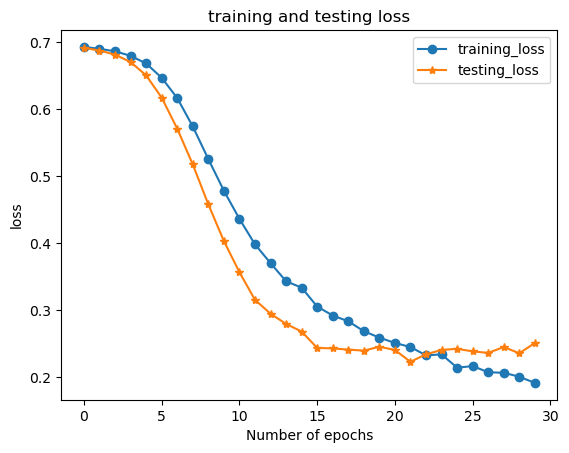

In [ ]:
a1=his1.history
p=pd.DataFrame(a1)
p['epoch']=his1.epoch
plt.plot(p['epoch'],p['loss'],label='training_loss',marker='o')
plt.plot(p['epoch'],p['val_loss'],label='testing_loss',marker='*')
plt.title('training and testing loss')
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Accuracy Comparison  between Training and Testing :

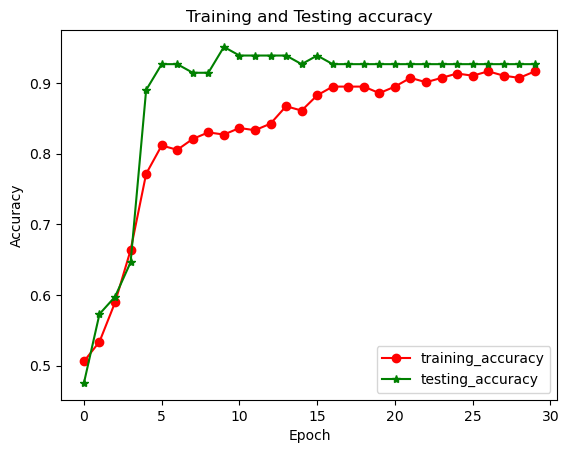

In [ ]:
plt.plot(p['epoch'],p['accuracy'],label='training_accuracy',marker='o',color='red')
plt.plot(p['epoch'],p['val_accuracy'],label='testing_accuracy',marker='*',color='green')
plt.title('Training and Testing accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Accuracies of all  models :

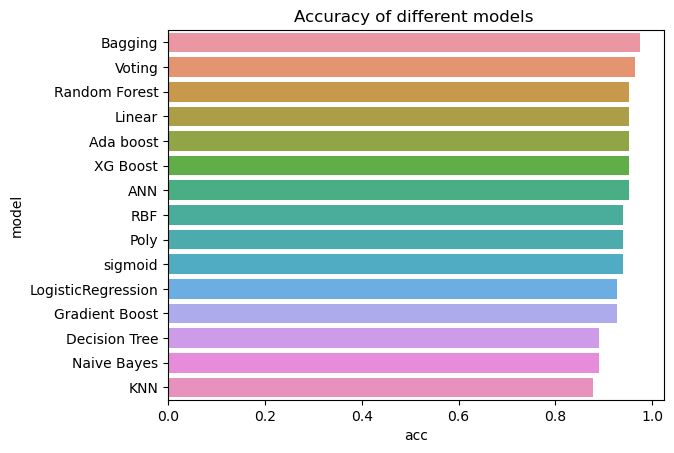

In [ ]:
f_df1=pd.DataFrame({'acc':[log.score(x_test,y_test),ran.score(x_test,y_test),dt.score(x_test,y_test),Sc1.score(x_test,y_test),
                          Sc2.score(x_test,y_test),Sc3.score(x_test,y_test),Sc4.score(x_test,y_test),knn.score(x_test,y_test),
                          nb.score(x_test,y_test),vc.score(x_test,y_test),bag.score(x_test,y_test),ada.score(x_test,y_test),
                          gr.score(x_test,y_test),xg.score(x_test,y_test),p['val_accuracy'].max()],
                          'model':['LogisticRegression','Random Forest','Decision Tree','RBF','Linear','Poly','sigmoid',
                                  'KNN','Naive Bayes','Voting','Bagging','Ada boost','Gradient Boost','XG Boost','ANN']})
f_df1.sort_values('acc',ascending=False,inplace=True)
sns.barplot(f_df1['acc'],f_df1['model'])
plt.title('Accuracy of different models ')
plt.show()

## Wrong Predictions:

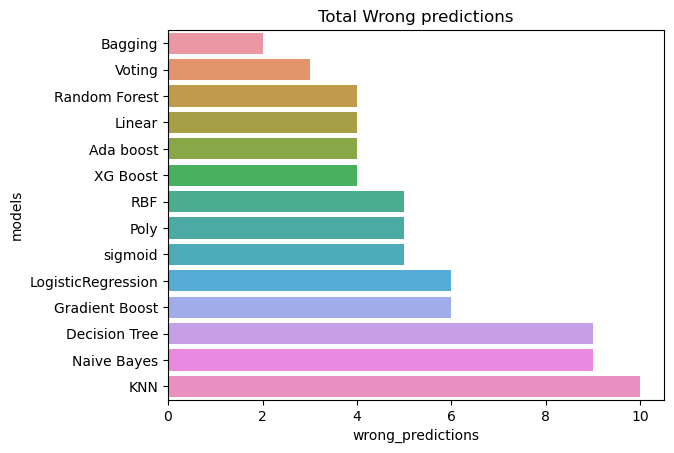

In [ ]:
l_df=pd.DataFrame({'models':['LogisticRegression','Random Forest','Decision Tree','RBF','Linear','Poly','sigmoid',
                                  'KNN','Naive Bayes','Voting','Bagging','Ada boost','Gradient Boost','XG Boost'],
                  'wrong_predictions':[W,W2,W1,W3,W4,W5,W6,W7,W8,W9,W10,W11,W12,W13]})
l_df.sort_values('wrong_predictions',inplace=True)
sns.barplot(l_df['wrong_predictions'],l_df['models'])
plt.title('Total Wrong predictions')
plt.show()